# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padronização de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 07/02/2022;

- Monitoria Projeto 01: 16/02/2022 (possivelmente);

- Data de Entrega: 18/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoAluno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

##### Aluno: Tiago Lyrio

Turma 781

# Imports

In [1]:
#import datatable as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil

import missingno as msno

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_validate

from imblearn.under_sampling import RandomUnderSampler  
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from mlxtend.plotting import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from pprint import pprint

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

import time

from dtreeviz.trees import dtreeviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

sns.set()

In [2]:
df_covid_na = pd.read_csv("COVID.csv",index_col=0)

In [3]:
df_covid_na.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,499692.0,0.493492,0.499958,0.0,0.0,0.0,1.0,1.0
patient_type,499692.0,0.784775,0.410978,0.0,1.0,1.0,1.0,1.0
intubed,107424.0,0.084739,0.278494,0.0,0.0,0.0,0.0,1.0
pneumonia,499681.0,0.157533,0.364302,0.0,0.0,0.0,0.0,1.0
age,499692.0,42.545942,16.640391,0.0,31.0,41.0,53.0,120.0
pregnancy,245258.0,0.014736,0.120492,0.0,0.0,0.0,0.0,1.0
diabetes,498051.0,0.125186,0.330930,0.0,0.0,0.0,0.0,1.0
copd,498246.0,0.016610,0.127806,0.0,0.0,0.0,0.0,1.0
asthma,498250.0,0.032542,0.177434,0.0,0.0,0.0,0.0,1.0
inmsupr,498030.0,0.016206,0.126267,0.0,0.0,0.0,0.0,1.0


In [4]:
df_covid_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [5]:
df_covid_na.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

# Analisando os valores faltantes

In [6]:
nan_percentual = (df_covid_na.isna().sum()/df_covid_na.shape[0]).round(2)
nan_percentual

sex                    0.00
patient_type           0.00
intubed                0.79
pneumonia              0.00
age                    0.00
pregnancy              0.51
diabetes               0.00
copd                   0.00
asthma                 0.00
inmsupr                0.00
hypertension           0.00
other_disease          0.00
cardiovascular         0.00
obesity                0.00
renal_chronic          0.00
tobacco                0.00
contact_other_covid    0.31
covid_res              0.00
icu                    0.79
dtype: float64

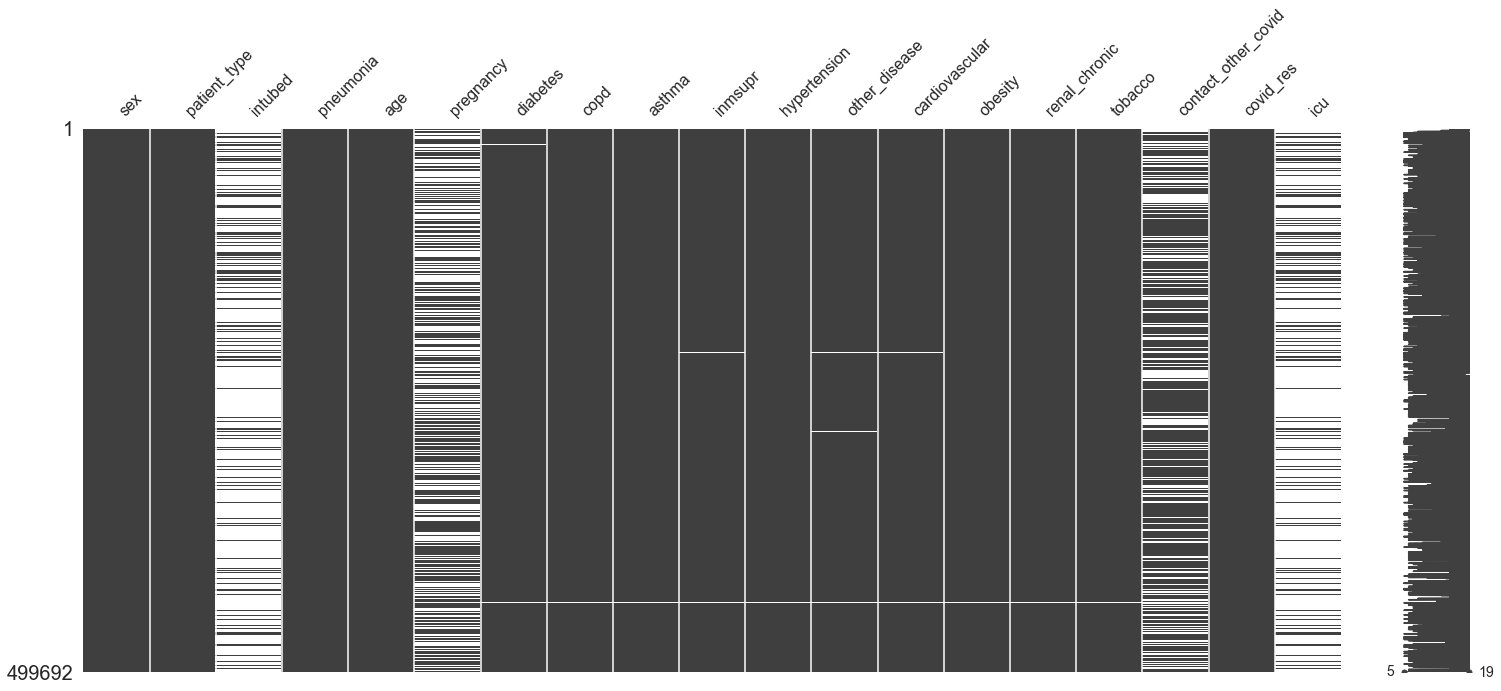

In [7]:
msno.matrix(df_covid_na);

In [8]:
nan_percentual[nan_percentual>0]

intubed                0.79
pregnancy              0.51
contact_other_covid    0.31
icu                    0.79
dtype: float64

Percebemos que existem 4 colunas com quantidades significativas de valores faltantes. Vamos analisar cada uma delas.

## pregnancy

Metade dos valores de pregnancy são faltantes

In [9]:
nan_percentual['pregnancy']

0.51

Sabemos que homens não podem engravidar. Vamos ver quantos desses valores faltantes são de pacientes do gênero masculino (sex=0):

In [10]:
mask = df_covid_na['pregnancy'].isna()
df_covid_na.loc[mask,'sex'].value_counts(normalize=True)

0    0.994749
1    0.005251
Name: sex, dtype: float64

99% dos valores faltantes de pregnancy são de homens.

Ao ordenar o dataset pela feature 'sex', podemos visualizar que os dados faltantes de 'pregnancy' se concentram no início (quando o valor é 0, gênero masculino).

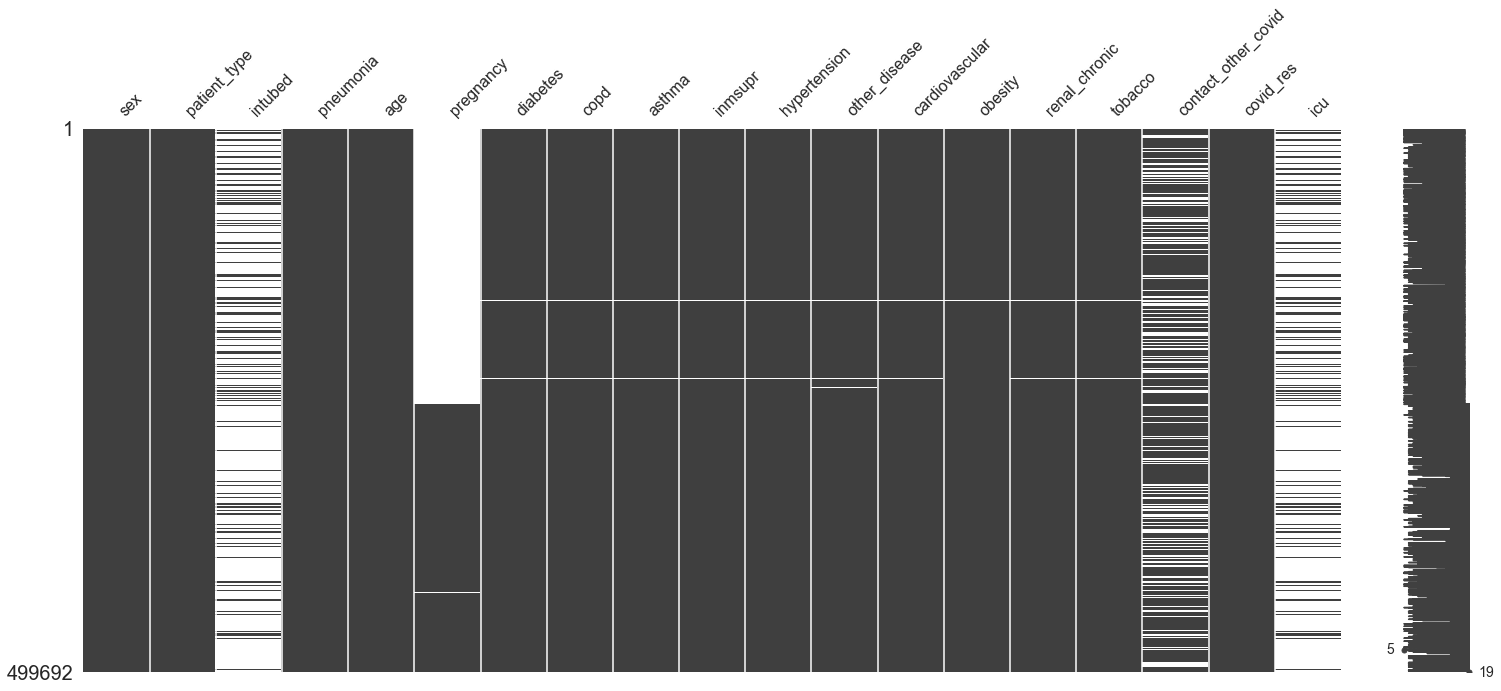

In [11]:
msno.matrix(df_covid_na.sort_values('sex'));

Vamos preencher esses valores com 0.

In [12]:
male_mask = df_covid_na['sex'] == 0
df_covid_na['pregnancy'].iloc[:][male_mask] = 0

## contact_other_covid

In [13]:
target = 'covid_res'
column = 'contact_other_covid'

In [14]:
pd.crosstab(
    index  = df_covid_na[column],
    columns= df_covid_na[target],
    values = df_covid_na[target],
    aggfunc='count',
    margins = True,
    normalize='index')

covid_res,0,1
contact_other_covid,,
0.0,0.561546,0.438454
1.0,0.622879,0.377121
All,0.596459,0.403541


Nessa tabela temos as seguintes informações:
- Nessa amostra, o percentual de pessoas com resultado positivos é 40%.
- Quem NÃO teve contato com uma pessoa infectada, tem 44% de resultado positivo.
- Quem TEVE contato com uma pessoa infectada, tem 38% de resultado positivo.

Como sabemos que isso não é verdade, temos 3 explicações para esse fato:
- Algumas pessoas tiveram contato com alguém contaminado, mas não sabem disso
- Algumas pessoas podem mentir sobre ter tido contato com alguém com COVID só para serem testadas
- Algumas pessoas realmente tiveram contato com alguém com COVID e mentiram sobre estar com sintomas

Para os valores faltantes, as estatísticas são as seguintes:

In [15]:
mask = df_covid_na['contact_other_covid'].isna()
df_covid_na[mask][target].value_counts(normalize=True)

1    0.527249
0    0.472751
Name: covid_res, dtype: float64

52% das pessoas que não responderam se tiveram contato com uma pessoa infectada testaram positivo. Ou seja, temos certeza que, pelo menos 52% dessas pessoas tiveram contato com outra pessoa com COVID (sabendo ou não), fora mais um percentual dos 48% que tiveram o resultado negativo. Se considerarmos isso, seria mais lógio completar os nan com 1, mas como essa feature não representa se a pessoa teve contato ou não com outra pessoa de COVID, mas sim se ela SUPOSTAMENTE tem CIÊNCIA que teve contato com alguém contaminado.

Dado o percentual extremamente equilibrado de resultados positivos, seria totalmente aleatório estimar como os valores faltantes podem ser completados sem alterar o viés dos dados. Poderíamos completar todos os valores faltantes com 0 e depois com 1 e ver qual das formas melhora o modelo e seguir com ela, por exemplo.

Como essa é uma feature é uma declaração (e não uma medição objetiva) e existe um conflito de interesse nessa declaração, dada as proporções contraditórias encontradas nos dados, optamos por remover a feature.

In [16]:
df_covid_na.drop(columns = 'contact_other_covid', inplace=True)

## icu e intubed

Sabemos que apenas os pacientes que foram internados (pacient_type=0) podem ter ido para a UTI ou terem sido intubados.

Vamos investigar quanto dos valores faltantes de ICU e intubed são de pacientes que não foram internados.

In [17]:
mask = df_covid_na['icu'].isna()
df_covid_na.loc[mask,'patient_type'].value_counts(normalize=True)

1    0.999686
0    0.000314
Name: patient_type, dtype: float64

In [18]:
mask = df_covid_na['intubed'].isna()
df_covid_na.loc[mask,'patient_type'].value_counts(normalize=True)

1    0.999689
0    0.000311
Name: patient_type, dtype: float64

Ao ordenar o dataframe por patient_type (Se o paciente foi dispensado para casa (1) ou se foi internado (0)), percebemos que os valores faltantes de 'icu' e 'intubed' ocorrem majoritariamente quando patient_type = 1. Ou seja, se o paciente foi mandado pra casa, ele não foi para a UTI, nem foi intubado.

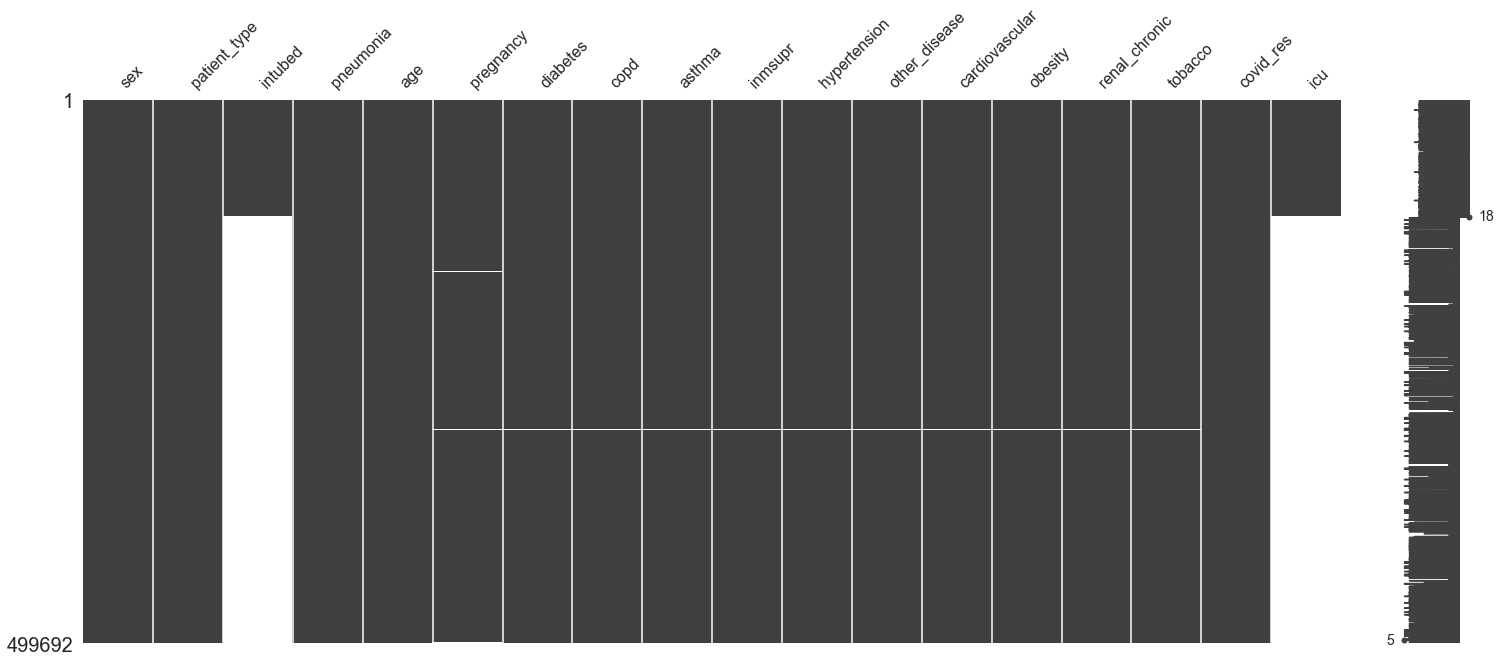

In [19]:
msno.matrix(df_covid_na.sort_values('patient_type'));

Vamos considerar que,  se 'patient_type' == 1, então 'intubed' = 0 e 'icu' = 0.

In [20]:
mask = df_covid_na['patient_type'] == 1
df_covid_na.loc[mask,'icu'] = 0
df_covid_na.loc[mask,'intubed'] = 0

## Reavaliando os valores faltantes:

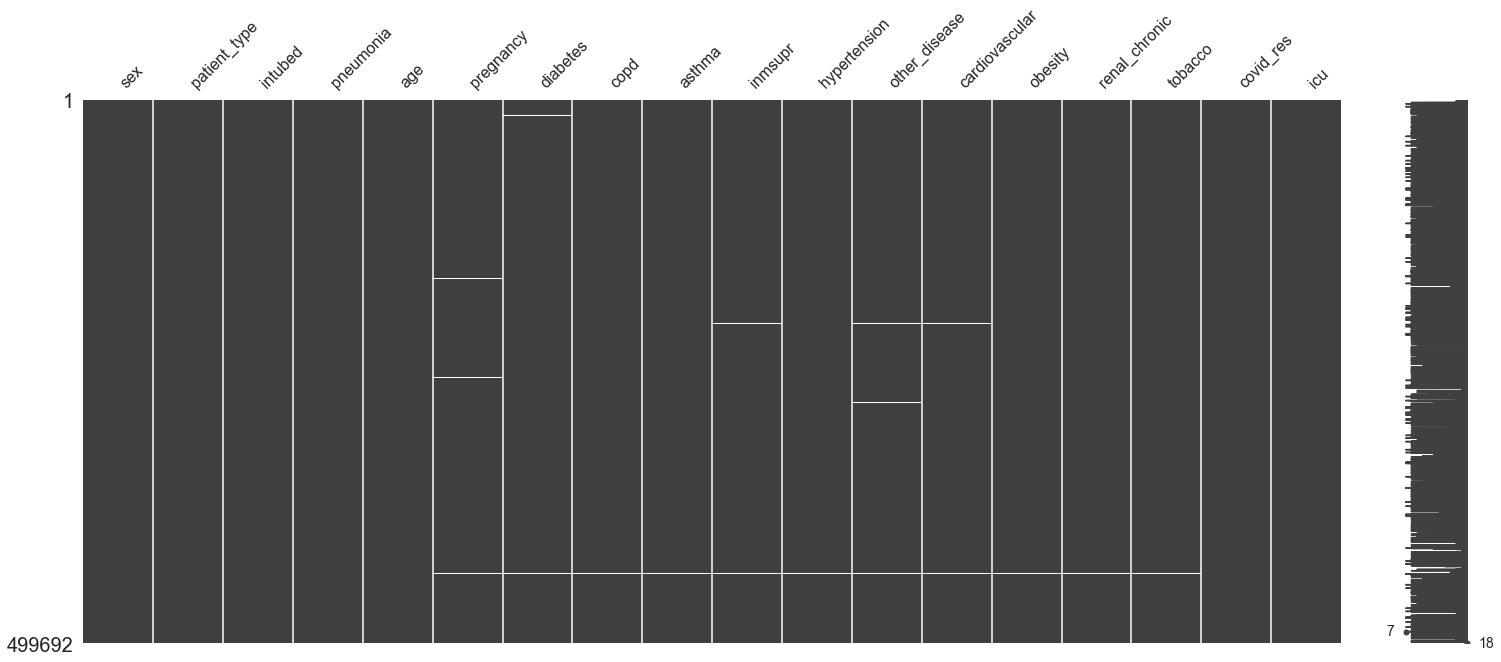

In [21]:
msno.matrix(df_covid_na);

In [22]:
nan_percentual = ((df_covid_na.isna().sum()/df_covid_na.shape[0]).round(3)*100).astype('str')+'%'
nan_percentual

sex               0.0%
patient_type      0.0%
intubed           0.0%
pneumonia         0.0%
age               0.0%
pregnancy         0.3%
diabetes          0.3%
copd              0.3%
asthma            0.3%
inmsupr           0.3%
hypertension      0.3%
other_disease     0.4%
cardiovascular    0.3%
obesity           0.3%
renal_chronic     0.3%
tobacco           0.3%
covid_res         0.0%
icu               0.0%
dtype: object

Para o restante dos dados faltantes (que correspondem a menos de 1% de cada feature), temos algumas alternativas:
- Preenchemos tudo com zero (se não foi informado, o mais provávél é que a pessoa não tenha determinada condição)
- Preenchemos com a moda ou com a meidiana.
- Excluímos os valores (por se tratar de manos de 1% do total, esses dados provavelmente não farão falta)

Dada a baixa representatividade dos valores faltantes, não vamos acrescentar muito viés se preenchermos os valores faltantes com a moda, exceto pela idade, que será a mediana.

In [23]:
df_covid_na.mode()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
0,0,1,0.0,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [24]:
df_covid_na['age'].median()

41.0

Colunas binárias para preencher os valores faltantes

In [25]:
boolean_na_columns = df_covid_na.columns.drop(['covid_res','age'])
boolean_na_columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'icu'],
      dtype='object')

In [26]:
int_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
boolean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_covid = pd.DataFrame(columns = df_covid_na.columns)
df_covid[boolean_na_columns] = pd.DataFrame(boolean_imputer.fit_transform(df_covid_na[boolean_na_columns]))
df_covid['age'] = pd.DataFrame(int_imputer.fit_transform(df_covid_na[['age']]))
df_covid['covid_res'] = df_covid_na['covid_res']

In [27]:
df_covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
0,0.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0.0,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
2,1.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0
3,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,1.0,0.0,0.0,0.0,60.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0


In [28]:
df_covid.isna().sum()

sex               0
patient_type      0
intubed           0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
icu               0
dtype: int64

# Fazendo alguns ajustes no dataframe

In [29]:
df_covid.head(5)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
0,0.0,1.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0.0,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
2,1.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0
3,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,1.0,0.0,0.0,0.0,60.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0


## Ajustando o tipo dos dados

In [30]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sex             499692 non-null  float64
 1   patient_type    499692 non-null  float64
 2   intubed         499692 non-null  float64
 3   pneumonia       499692 non-null  float64
 4   age             499692 non-null  float64
 5   pregnancy       499692 non-null  float64
 6   diabetes        499692 non-null  float64
 7   copd            499692 non-null  float64
 8   asthma          499692 non-null  float64
 9   inmsupr         499692 non-null  float64
 10  hypertension    499692 non-null  float64
 11  other_disease   499692 non-null  float64
 12  cardiovascular  499692 non-null  float64
 13  obesity         499692 non-null  float64
 14  renal_chronic   499692 non-null  float64
 15  tobacco         499692 non-null  float64
 16  covid_res       499692 non-null  int64  
 17  icu       

In [31]:
df_covid = df_covid.astype('uint8')
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   sex             499692 non-null  uint8
 1   patient_type    499692 non-null  uint8
 2   intubed         499692 non-null  uint8
 3   pneumonia       499692 non-null  uint8
 4   age             499692 non-null  uint8
 5   pregnancy       499692 non-null  uint8
 6   diabetes        499692 non-null  uint8
 7   copd            499692 non-null  uint8
 8   asthma          499692 non-null  uint8
 9   inmsupr         499692 non-null  uint8
 10  hypertension    499692 non-null  uint8
 11  other_disease   499692 non-null  uint8
 12  cardiovascular  499692 non-null  uint8
 13  obesity         499692 non-null  uint8
 14  renal_chronic   499692 non-null  uint8
 15  tobacco         499692 non-null  uint8
 16  covid_res       499692 non-null  uint8
 17  icu             499692 non-null  uint8
dtypes: u

## Alterando a ordem das colunas.

In [32]:
df_covid.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res', 'icu'],
      dtype='object')

In [33]:
ordered_columns = ['sex', 'age', 'pregnancy', 'pneumonia',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'other_disease', 'patient_type', 'icu', 'intubed', 'covid_res']

In [34]:
df_covid = df_covid[ordered_columns]

## Renomeando a feature patient_type

Para evitar confusão, vamos renomear patient_type para home_treatment, indicando que, quando 1, o paciente foi tratado fora do ambiente hospitalar (em casa).

In [35]:
df_covid.rename(columns={'patient_type':'home_treatment'},inplace=True)

In [36]:
df_covid.head(5)

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed,covid_res
0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,54,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,60,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1


# EDA

## Funções para plotar gráficos

In [37]:
#Função para facilitar colocar textos nos gráficos.
def title_and_labels(ax, title, xlabel, ylabel, fontsize, color='black',rotation=0):
    '''
    função para personalizar os textos de um gráfico: título, eixo x, eixo y.
    É possível escolher a cor, o tamanho da fonte e o ângulo de rotação dos labels do eixo x.
    O tamanho escolhido será aplicado no título. Os eixos terão uma fonte 4 pontos menor.
    '''
    ax.set_title(title, fontsize=fontsize, fontweight='bold', color=color)  
    ax.set_xlabel(xlabel, fontsize=fontsize-4, fontweight='bold', color=color)
    ax.set_ylabel(ylabel, fontsize=fontsize-4, fontweight='bold', color=color)  
    ax.tick_params(axis='both', colors = color)
    plt.tick_params(axis='x', rotation=rotation)

#Função colocar anotações no topo das barras
def annotate_bar(ax,mode='abs'):
    '''
    Coloca anotações no topo das barras em um gráfico de barras
    Pode colocar o valor em valor absoluto ou valor percentual
    mode : 'abs', 'percent'
    '''
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y= p.get_height()
        value = p.get_height()
        
        #colocar em valor absoluto
        if mode == 'abs':
            if value>10000:
                text = str(int(value/1000))+'k'
            else:
                text =int(value)
        #colocar em valor percentual
        elif mode == 'percent':
            text = str(round(value*100,1))+'%'
        
        ax.annotate(
            text,
            (x,y),
            ha='center',va='bottom',
            fontsize=12,color='#337',
            fontweight='bold', #[ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
        )


In [38]:
def plot_cases(df,x,y,tick_dict,pallete,title,xlabel,ylabel='Chances (casos)',ax=None,figsize=(7,5)):
    '''
    Plota a ocorrência de determinado evento (y), dado determinado universo (x).
    A escala do eixo y é percentual, mas no gráfico também são anotados os valores absolutos, para termos uma noção da representatividade.
    
    df        : dataframe com os dados
    x         : coluna do eixo y
    y         : coluna do eixo y
    tick_dict : dicionário de correspondencia entre o valor e o significado de cada feature, ex: {0:'Masculino',1:'Feminino'}
    pallete   : paleta de cores (lista de string hexadecimal, ex: ['#F55','#44A'])
    title,
    xlabel,
    ylabel    : textos do gráfico
    ax        : caso queira plotar em um ax já criado, basta passar aqui (opcional)
    figsize   : tamanho da figura (quando não existir uma ax prévio)
    '''
    
    if ax==None:
        fig, ax = plt.subplots(1,1, figsize=figsize)

    df = (df[[x,y]].groupby(x).agg(['mean','sum']))
    df.columns = df.columns.droplevel()

    sns.barplot(data=df.reset_index(),x=x,y='mean',
                palette=pallete,ax=ax)

    title_and_labels(
        ax       = ax,
        title    = title,
        xlabel   = xlabel,
        ylabel   = ylabel,
        fontsize = 18,
        color    = '#55A'
    )
    
    for i,p in enumerate(ax.patches):
        x = p.get_x() + p.get_width() / 2
        y= p.get_height()
        text = str(round(df.loc[i,'mean']*100,1))+'% '+f'({int(df.loc[i,"sum"])})'

        ax.annotate(
            text,
            (x,y),
            ha='center',va='bottom',
            fontsize=12,color='#337',
            fontweight='bold', #[ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
        )

    ticks = ax.get_xticks()
    ax.set_xticklabels(list(map(tick_dict.get,ticks)))
    ax.set_ylim(1.2*np.array(ax.get_ylim()));

In [39]:
def desenha_seta(ax,color='#B88'):
    '''
    Em um gráfico de barras, com duas barras, 
    desenha uma seta do centro do topo da primeira barra até o centro do topo da segunda barra.
    '''
    xy=[] #coordenadas do centro do topo de cada barra
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        xy.append((x,y))

    #seta subindo
    if xy[0][1]<=xy[1][1]:
        connectionstyle = "angle3,angleA=0,angleB=90"
    #seta descendo
    else:
        connectionstyle = "angle3,angleA=90,angleB=0"
        
    #desenha as setas 
    ax.annotate("",
                xy=xy[1], xycoords='data', #a seta chega na coordenada xy[0]
                xytext=xy[0], textcoords='data',#a seta sai da coordenada xy[1]
                arrowprops=dict(arrowstyle="simple", color=color,
                                connectionstyle=connectionstyle,#angulos de chegada e saída
                                ),
                )
    #quantidade de vezes que uma barra é maior que a outra
    text = str(round(np.array(xy)[1,1]/np.array(xy)[0,1],2))+'x'

    ax.text(*np.array(xy).mean(axis=0),#desempacota as coordenadas (de tupla para 2 valores)
            text, weight="bold", fontsize=25,color='#722')

In [40]:
def uci_vs_covid_chances (comorbiditie):
    '''
    De acordo com a comorbidade informada, plota 2 gráficos:
        Chance de estar com covid, por faixa etária.
        Chance de internar em UTI, por faixa etária.
    '''
    fig, ax = plt.subplots(1,2,figsize=(16,5))

    sns.barplot(data=df_covid,x='age_group',y='covid_res',
                hue=comorbiditie,ax=ax[0],palette=pallete['comorbiditie']);

    sns.barplot(data=df_covid,x='age_group',y='icu',
                hue=comorbiditie,ax=ax[1],palette=pallete['severity']);

    ylabel = ['Probabilidade de COVID', 'Probabilidade de UTI']
    for i in [0,1]:
        title_and_labels(
            ax       = ax[i],
            title    = '',
            xlabel   = 'Faixa etária',
            ylabel   = ylabel[i],
            fontsize = 15,
            color    = '#55A'
        );

In [41]:
df_covid.columns

Index(['sex', 'age', 'pregnancy', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'other_disease', 'home_treatment', 'icu', 'intubed',
       'covid_res'],
      dtype='object')

Para analisar nossos dados, vamos separar as features em 3 grupos:
- Indicadores pessoais: 'age', 'sex'
- Comorbidades: 'pneumonia', 'diabetes', 'copd', 'asthma','inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic','tobacco', 'other_disease'
- Indicadores de gravidade: 'home_treatment', 'icu', 'intubed'

Além desse grupos, temos também 'pregnancy' e 'pneumonia'

In [42]:
personal     = ['age', 'sex']

comorbidities = ['diabetes', 'copd', 'asthma','inmsupr', 'hypertension',
                 'cardiovascular', 'obesity', 'renal_chronic','tobacco',
                 'other_disease']

severity     = ['home_treatment', 'icu', 'intubed']

target       = 'covid_res'

Para facilitar a visualização da gravidade, vamos criar um score de gravidade baseado nos indicadores de gravidade:
- 0: Casos leves (paciente foi tratado em casa)
- 1: Casos moderados (paciente foi tratado no hospital, mas não precisou ir pra UTI)
- 2: Casos graves (paciente foi tratado na UTI)
- 3: Casos gravíssimos (paciente foi intubado)

Classificaremos de acordo com os seguintes critérios:
- Todos os casos de 'intubed' = 1, gravidade =3
- Todos os casos de 'intubed' = 0 e 'icu' = 1 , gravidade =2
- Todos os casos de 'home_treatment' = 0,'intubed' = 0 e 'icu' = 0 , gravidade =1
- Todos os casos de 'home_treatment' = 1, gravidade =0

Surpreendentemente podemos observar que existem pacientes que foram intubados e não foram para a UTI

In [43]:
#pacientes que foram intubados fora da UTI.
mask = (df_covid['icu']==0) & (df_covid['intubed']==1)

df_covid[mask]

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed,covid_res
9,1,39,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
50,0,57,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1
79,1,67,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1
97,1,52,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
108,0,67,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498835,0,58,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
498850,0,65,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0
499255,1,48,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
499613,1,23,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


Todo paciente intubado deveria estar na UTI (alguns hospitais diferenciam leitos intensivos de semi intensivos). Não sei se é o caso desse hospital, se não haviam leitos disponíveis (mas é pouco provável que houvessem respiradores nesse caso), ou se foi um erro de digitação.
Como essa estatística não fará parte de nossa análise, vamos considerar que todos os pacientes que foram intubados, foram pra UTI (ou semi intensiva).

In [44]:
df_covid.loc[mask,'icu'] = 1

Criando a coluna severity

In [45]:
%%time
df_covid['severity'] = np.max([1-df_covid['home_treatment'],2*df_covid['icu'],3*df_covid['intubed']],axis=0)

Wall time: 3 ms


In [46]:
df_covid[severity+['severity']].head(10)

,home_treatment,icu,intubed,severity
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,2
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0
9,0,1,1,3


In [47]:
#Paleta de cores:
pallete = dict()
pallete['covid'] = ['#777','#C55']
pallete['gender'] = ['#55A','#A55']
pallete['pregnancy'] = ['#555','#F99']
pallete['pneumonia'] = ['#DDD','#ADA']
pallete['comorbiditie_light'] = ['#DDD','#DDA']
pallete['comorbiditie'] = ['#777','#BB5']
pallete['severity'] = ['#777','#B55']

## Resultados de COVID (geral)

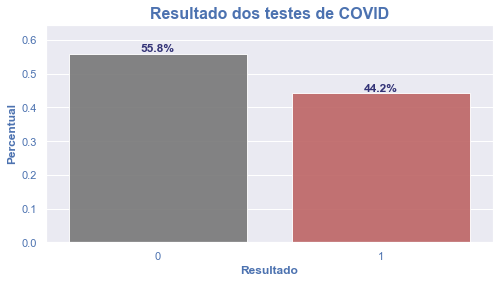

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
column = 'covid_res'

data = df_covid_na[column].value_counts(normalize=True).reset_index()

sns.barplot(data = data,
            x= 'index',
            y= column,
            palette=pallete['covid'],
            alpha=.9,
            ax=ax
           )
ax.set_ylim(1.1*np.array(ax.get_ylim()))

annotate_bar(ax,mode='percent')
    
title_and_labels(
    ax       = ax,
    title    = 'Resultado dos testes de COVID',
    xlabel   = 'Resultado',
    ylabel   = 'Percentual',
    fontsize = 16,
    color    = 'b',
);

## Age

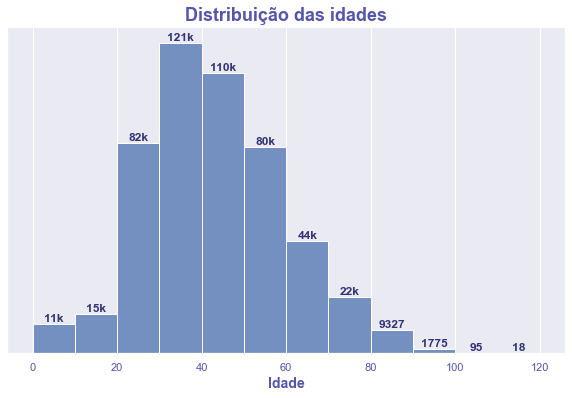

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

sns.histplot(df_covid['age'], binwidth=10)

annotate_bar(ax)

title_and_labels(
    ax       = ax,
    title    = 'Distribuição das idades',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 18,
    color    = '#55A'
);

ax.set_yticks([]);

Distribuição dos casos graves de COVID

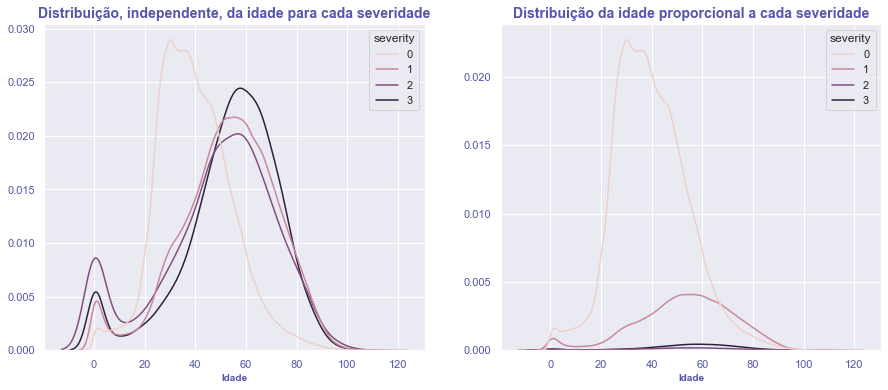

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.kdeplot(df_covid['age'],hue=df_covid['severity'],common_norm = False,ax=ax[0])
sns.kdeplot(df_covid['age'],hue=df_covid['severity'],common_norm = True,ax=ax[1])
title_and_labels(
    ax       = ax[0],
    title    = 'Distribuição, independente, da idade para cada severidade',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 14,
    color    = '#55A'
);
title_and_labels(
    ax       = ax[1],
    title    = 'Distribuição da idade proporcional a cada severidade',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 14,
    color    = '#55A'
);

Vemos que, quanto maior a idade, mais chance o paciente tem de desenvolver um quadro mais grave, mas, proporcionalmente, os casos graves são muito mais raros.

Distribuição dos de COVID

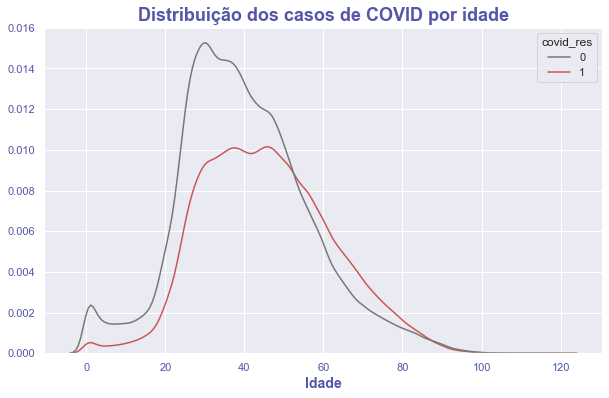

In [51]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
pallete['covid'] = ['#777','#C55']

sns.kdeplot(df_covid['age'],hue=df_covid['covid_res'],palette=pallete['covid'], ax=ax)

title_and_labels(
    ax       = ax,
    title    = 'Distribuição dos casos de COVID por idade',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 18,
    color    = '#55A'
);

Vamos ver qual é o ocorrência média de covid por faixa etária:

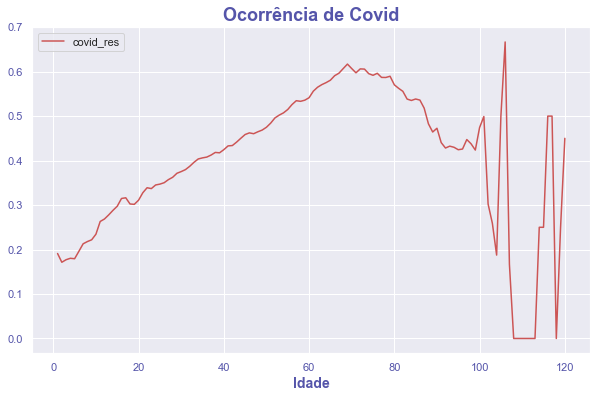

In [52]:
df_age_icu = (df_covid[['age','covid_res']].groupby('age').agg('mean')).rolling(2).mean()
ax = df_age_icu.plot(figsize = (10,6),color = pallete['covid'][1])

title_and_labels(
    ax       = ax,
    title    = 'Ocorrência de Covid',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 18,
    color    = '#55A'
);

Como temos poucas amostras de pacientescom idade próxima a 100 anos, vemos esses picos e vales, mas é possível perceber a tendencia crescente.

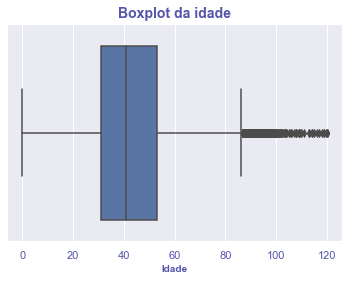

In [53]:
ax=sns.boxplot(x=df_covid['age'])

title_and_labels(
    ax       = ax,
    title    = 'Boxplot da idade',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 14,
    color    = '#55A'
);

Vamos remover esses outliers de idade

In [54]:
iqt = df_covid['age'].quantile(0.75)-df_covid['age'].quantile(0.25)
age_limit = df_covid['age'].quantile(0.75)+1.5*iqt
age_limit

86.0

In [55]:
mask = df_covid['age']<=age_limit
df_covid = df_covid[mask]

Plotando o gráfico novamente:

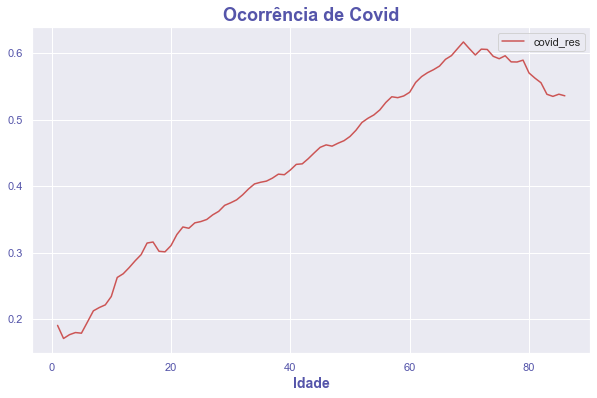

In [56]:
df_age_icu = (df_covid[['age','covid_res']].groupby('age').agg('mean')).rolling(2).mean()
ax = df_age_icu.plot(figsize = (10,6),color = pallete['covid'][1])

title_and_labels(
    ax       = ax,
    title    = 'Ocorrência de Covid',
    xlabel   = 'Idade',
    ylabel   = '',
    fontsize = 18,
    color    = '#55A'
);

Vamos dividir as idades de acordo com a média de ocorrência de covid

In [57]:
covid_age_describe = df_covid[df_covid['covid_res']==1]['age'].describe()
covid_age_describe

count    219021.000000
mean         45.353583
std          15.903978
min           0.000000
25%          33.000000
50%          44.000000
75%          56.000000
max          86.000000
Name: age, dtype: float64

In [58]:
age_bins = covid_age_describe[['min','25%','50%','75%']].astype(int).tolist()
age_bins.append(df_covid['age'].max())
age_bins

[0, 33, 44, 56, 86]

In [59]:
age_labels = [f'age_{age_bins[i]}_{age_bins[i+1]}' for i in range(len(age_bins)-1)]

age_index = df_covid.columns.get_loc('age') #localização da coluna age

df_covid.insert(age_index+1, #inserir ao lado da coluna AGE
                'age_group', #nome da nova coluna
                pd.cut(df_covid['age'],bins=age_bins,labels=age_labels,include_lowest=True)) #divide age com cut

In [60]:
age_labels

['age_0_33', 'age_33_44', 'age_44_56', 'age_56_86']

In [61]:
df_covid['age_group'].isna().sum()

0

In [62]:
df_covid.head()

,sex,age,age_group,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed,covid_res,severity
0,0,27,age_0_33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,24,age_0_33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,54,age_44_56,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,0,30,age_0_33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1,60,age_56_86,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1


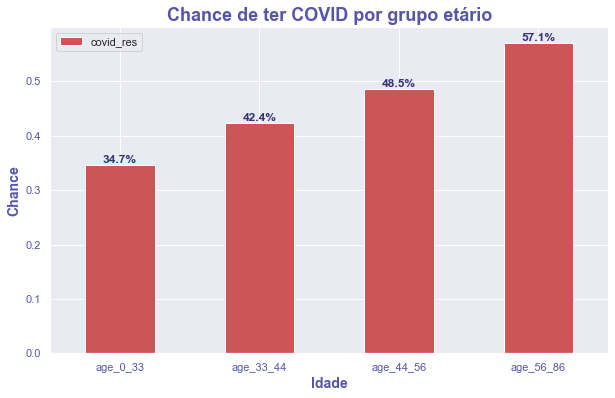

In [63]:
df_age_group_icu = (df_covid[['age_group','covid_res']].groupby('age_group').agg('mean'))
ax = df_age_group_icu.plot(figsize = (10,6),kind='bar',color = pallete['covid'][1])
annotate_bar(ax,mode='percent')
title_and_labels(
    ax       = ax,
    title    = 'Chance de ter COVID por grupo etário',
    xlabel   = 'Idade',
    ylabel   = 'Chance',
    fontsize = 18,
    color    = '#55A'
);

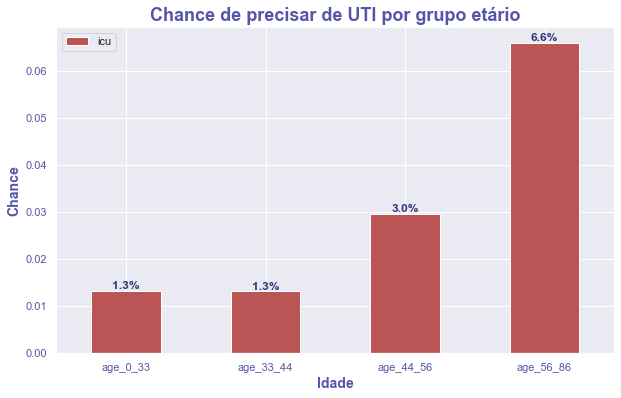

In [64]:
df_age_group_icu = (df_covid[['age_group','icu']].groupby('age_group').agg('mean'))
ax = df_age_group_icu.plot(figsize = (10,6),kind='bar',color=pallete['severity'][1])
annotate_bar(ax,mode='percent')
title_and_labels(
    ax       = ax,
    title    = 'Chance de precisar de UTI por grupo etário',
    xlabel   = 'Idade',
    ylabel   = 'Chance',
    fontsize = 18,
    color    = '#55A'
);

## Sex

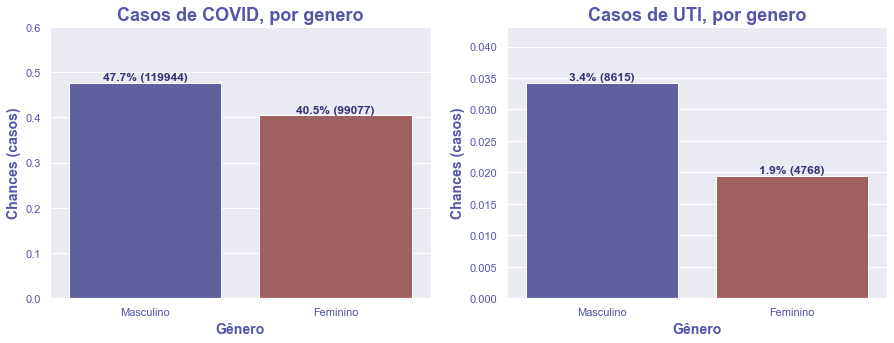

In [65]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

gender_dict = {0:'Masculino', 1:'Feminino'}
    
plot_cases(df=df_covid,x='sex',y='covid_res',
             tick_dict=gender_dict,pallete=pallete['gender'],
             title='Casos de COVID, por genero',
             xlabel='Gênero',
             ax=ax[0]
            )

plot_cases(df=df_covid,x='sex',y='icu',
             tick_dict=gender_dict,pallete=pallete['gender'],
             title='Casos de UTI, por genero',
             xlabel='Gênero',
             ax=ax[1]
            )

Homens tem mais chance de pegar covid.

Homens tem mais chance de desenvolver quadros graves de COVID.

Leitura recomendada sobre o tema:
- The Double Edge Sword of Testosterone's Role in the COVID-19 Pandemic
    (https://www.frontiersin.org/articles/10.3389/fendo.2021.607179/full)

## Pregnancy

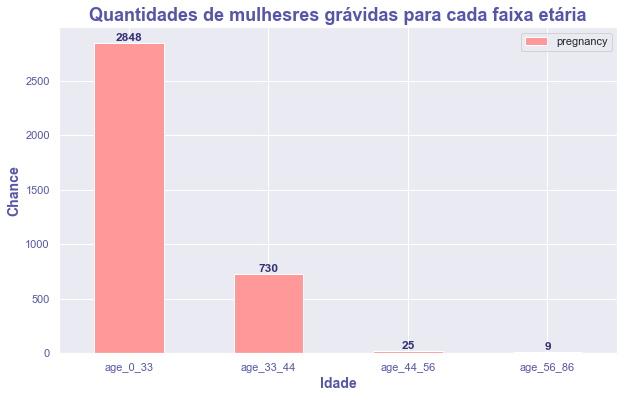

In [66]:
df_age_group_icu = (df_covid[['age_group','pregnancy']].groupby('age_group').agg('sum'))

ax = df_age_group_icu.plot(figsize = (10,6),kind='bar',color=pallete['pregnancy'][1])
annotate_bar(ax,mode='abs')

title_and_labels(
    ax       = ax,
    title    = 'Quantidades de mulhesres grávidas para cada faixa etária',
    xlabel   = 'Idade',
    ylabel   = 'Chance',
    fontsize = 18,
    color    = '#55A'
);

Como sabemos, gravidez após os 50 anos é extremamente rara. Vamos considerar como erro de digitação ocorrência de gravidez em mulheres com mais de 55 anos

In [67]:
mask = df_covid['age']>55
df_covid.loc[mask,'pregnancy'] = 0

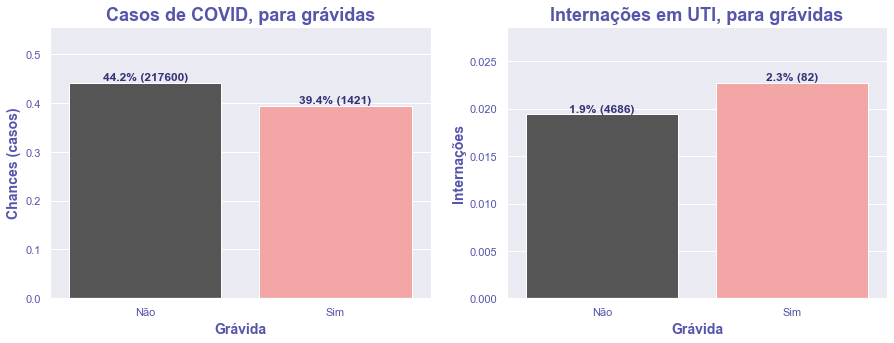

In [68]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

yes_no_dict = {0:'Não', 1:'Sim'}

plot_cases(df=df_covid,x='pregnancy',y='covid_res',
             tick_dict=yes_no_dict,pallete=pallete['pregnancy'],
             title='Casos de COVID, para grávidas',
             xlabel='Grávida',
             ax=ax[0]
            )

plot_cases(df=df_covid[df_covid['sex']==1],x='pregnancy',y='icu',
             tick_dict=yes_no_dict,pallete=pallete['pregnancy'],
             title='Internações em UTI, para grávidas',
             xlabel='Grávida',
             ylabel='Internações',
             ax=ax[1]
            )

Dos 500 mil pacientes, apenas 82 são mulheres grávidas que foram internadas na UTI. É uma quantidade muito baixa para fazermos uma análise precisa.

## Pneumonia

Pneumonia é uma infecção e não uma comorbidade. De todas as features em 'pre_existing', 'pneumonia' é a única que pode ser de fato causada por COVID (quando o COVID ataca as vias aéreas inferiores).

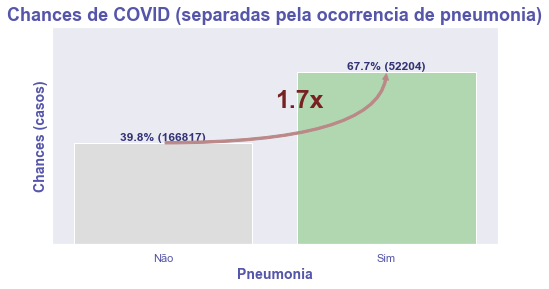

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))    

plot_cases(df=df_covid,x='pneumonia',y='covid_res',
             tick_dict=yes_no_dict,pallete=pallete['pneumonia'],
             title=f'Chances de COVID (separadas pela ocorrencia de pneumonia)',
             xlabel='Pneumonia',
             ax=ax
            )

desenha_seta(ax)

ax.set_yticks([]);#retira o eixo y pra deixar o gráfico mais limpo

##### Prevalência da pneumonia na amostra

In [70]:
df_covid['pneumonia'].value_counts()

0    418959
1     77145
Name: pneumonia, dtype: int64

In [71]:
(df_covid['pneumonia'].value_counts(normalize=True)).round(3)[1]

0.156

15,4% dos pacientes apresentaram pneumonia.

##### Prevalência de pneumonia separada pelo resultado de COVID

In [72]:
total_cases = df_covid['covid_res'].sum()
total_cases

219021

In [73]:
df_covid.groupby('covid_res').agg('sum')['pneumonia']

covid_res
0    24941.0
1    52204.0
Name: pneumonia, dtype: float64

In [74]:
df_covid.groupby('covid_res').agg('sum')['pneumonia']/total_cases

covid_res
0    0.113875
1    0.238352
Name: pneumonia, dtype: float64

23,7% dos 216 mil casos de covid desenvolveram pneumonia.

## Comorbidades

In [527]:
print(comorbidities)

['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'other_disease']


Prevalência de cada comorbidade na amostra:

In [528]:
prevalencia = pd.DataFrame((df_covid[comorbidities].sum()),columns=['Prevalência']).sort_values('Prevalência',ascending=False)
prevalencia['%'] = (prevalencia['Prevalência']/df_covid.shape[0]*100).round(1)
prevalencia

,Prevalência,%
obesity,81642,16.5
hypertension,79565,16.0
diabetes,61488,12.4
tobacco,42624,8.6
asthma,16141,3.3
other_disease,15135,3.1
cardiovascular,10952,2.2
renal_chronic,9809,2.0
inmsupr,7954,1.6
copd,7681,1.5


### Chances de COVID (separadas pela ocorrencia de cada comorbidade)

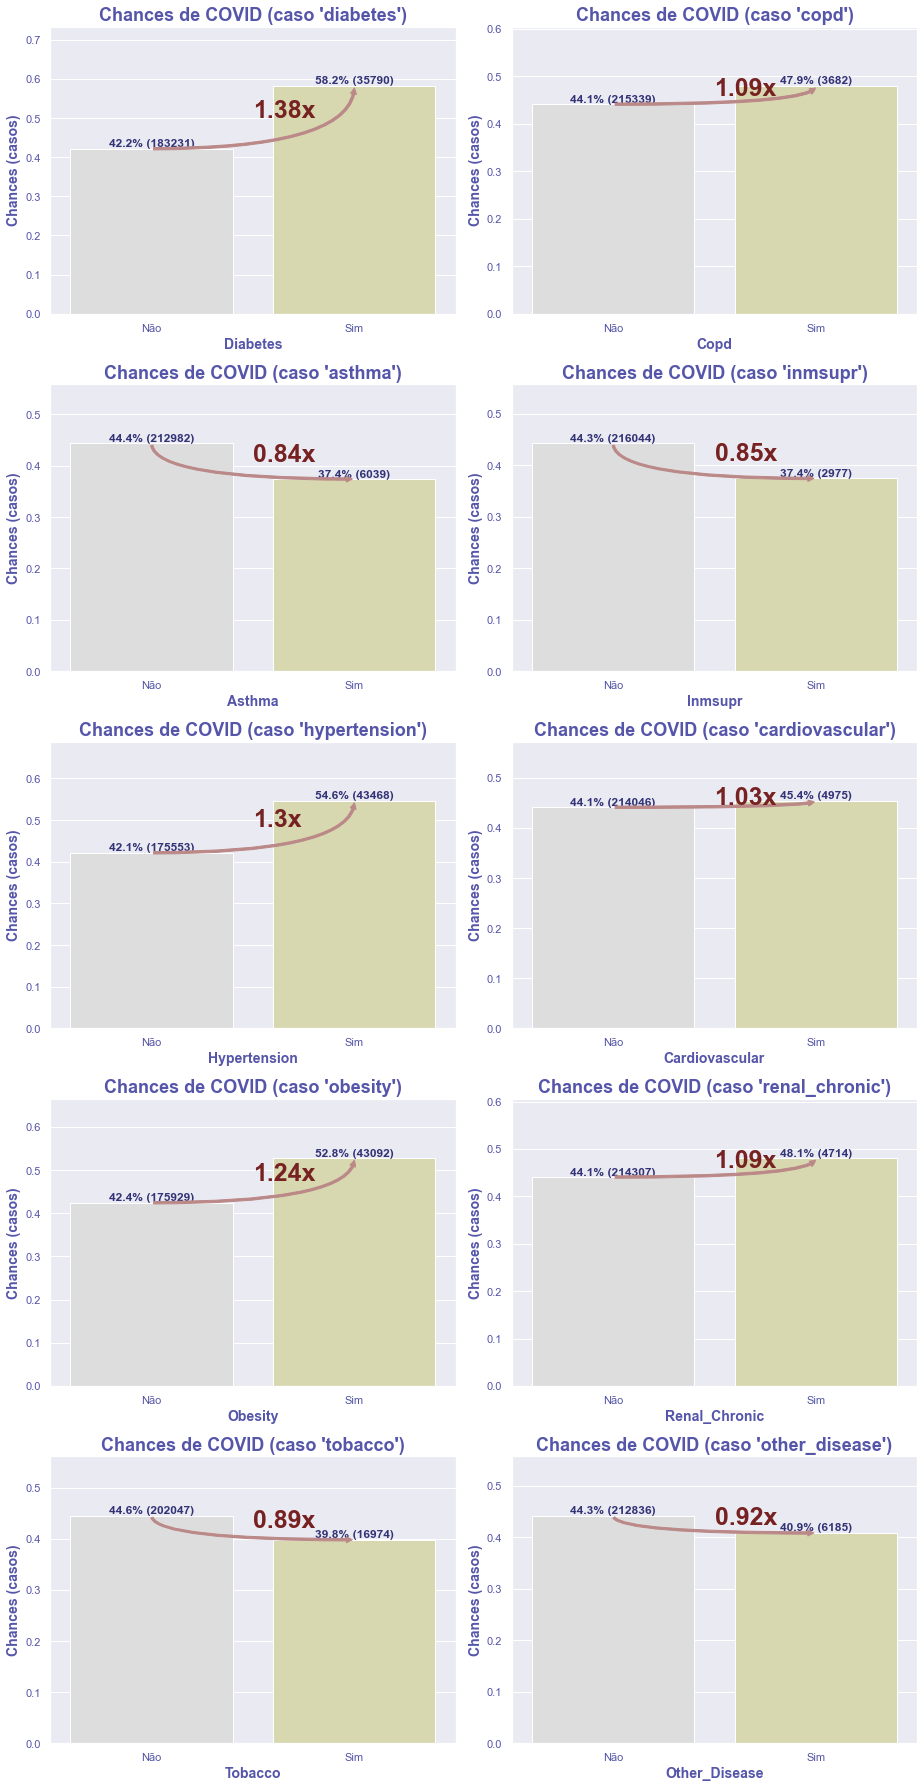

In [76]:
fig, ax = plt.subplots(int(len(comorbidities)/2),2, figsize=(13, len(comorbidities)*2.5))
ax = ax.ravel()

for i,comorbiditie in enumerate(comorbidities):
    
    mask = df_covid[comorbiditie]==1
    plot_cases(df=df_covid,x=comorbiditie,y='covid_res',
                 tick_dict=yes_no_dict,pallete=pallete['comorbiditie_light'],
                 title =f'Chances de COVID (caso \'{comorbiditie}\')',
                 xlabel=comorbiditie.title(),
                 ylabel='Chances (casos)',
                 ax=ax[i]
                )

    desenha_seta(ax[i])


fig.tight_layout()

Podemos observar que, para alguns grupos de comorbidades ('diabetes', 'hypertension' e 'obesity'), a chance de estar com covid é signicativamente maior.

## Indicadores de severidade

In [77]:
severity

['home_treatment', 'icu', 'intubed']

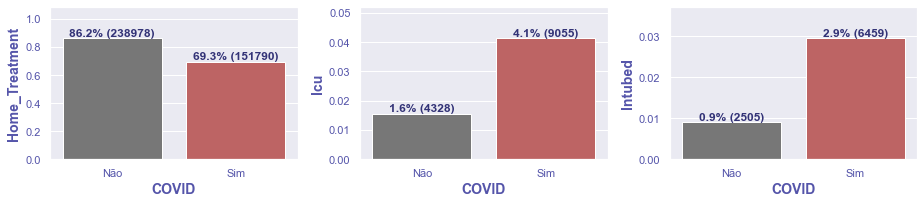

In [78]:
fig, ax = plt.subplots(1,3, figsize=(13, 3))
ax = ax.ravel()

for i,severity_condition in enumerate(severity):

    plot_cases(df=df_covid,x='covid_res',y=severity_condition,
                 tick_dict=yes_no_dict,pallete=pallete['covid'],
                 title='',
                 xlabel='COVID',
                 ylabel=severity_condition.title(),
                 ax=ax[i]
                )
fig.tight_layout()

Dos pacientes com COVID, 4% estão na UTI e 3% estão intubados.

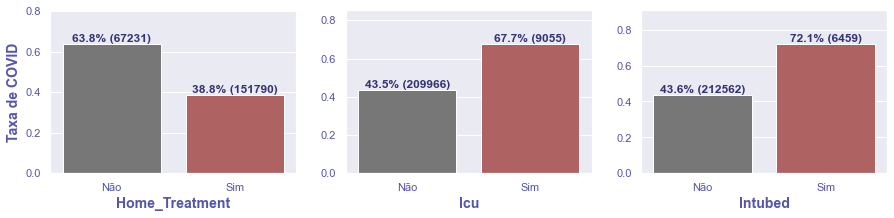

In [79]:
fig, ax = plt.subplots(1,3, figsize=(15, 3))
ax = ax.ravel()

for i,severity_condition in enumerate(severity):
    if i==0:
        ylabel='Taxa de COVID'
    else:
        ylabel=''

    plot_cases(df=df_covid,y='covid_res',x=severity_condition,
                 tick_dict=yes_no_dict,pallete=pallete['severity'],
                 title='',
                 xlabel=severity_condition.title(),
                 ylabel=ylabel,
                 ax=ax[i]
                )

- Dos pacientes que receberam alta, 39% tem COVID,
- Dos pacientes que foram internados, 64% tem COVID,
- Dos pacientes que estão na UTI, 68% tem COVID,
- Dos pacientes que estão na intubados, 72% tem COVID

### Diferença entre chance de estar com COVID e chance de desenvolver um quadro grave

Não vamos nos aprofundar nessa análise, mas é umportante ter em mente que uma comorbidade diminuir as chances do paciente estar contaminado por COVID, não quer dizer que, uma vez contaminado, o paciente evoluirá para um quadro menos grave da doença. Vamos ilustrar com alguns exemplos.

#### Tabagismo

O tabagismo aparece como um fator de resistência à contaminação (fumantes tem menos chances de pegar COVID), porém, quando analisamos a taxa de internação de fumantes, podemos observar que ela é significativamente maior para pacientes acima de 44 anos, por se tratar de uma comorbidade de caráter cumulativo (quanto mais tempo você fuma, mais grave são os sintomas).

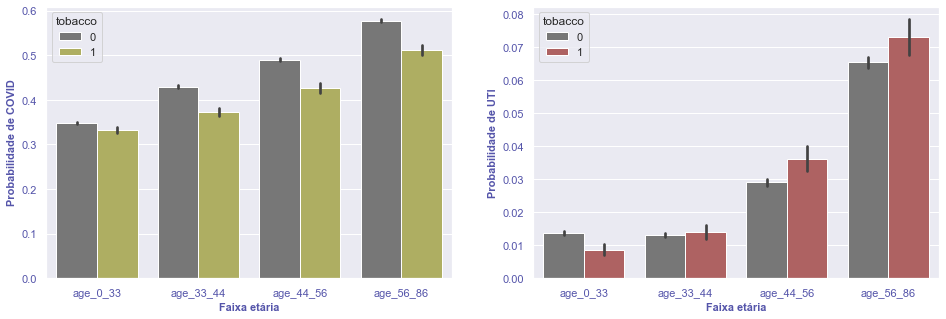

In [81]:
comorbiditie = 'tobacco'
uci_vs_covid_chances (comorbiditie)

#### Asma

Já a asma, diminui a probabilidade de internação e de contágio.

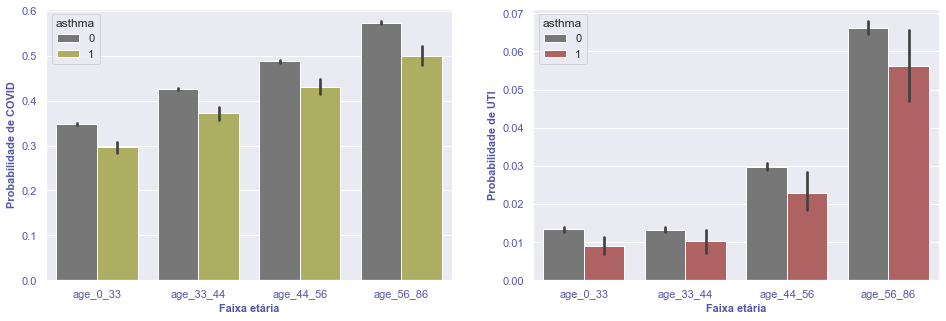

In [82]:
comorbiditie = 'asthma'
uci_vs_covid_chances (comorbiditie)

#### Demais comorbidades

É possível fazer esse mesmo gráfico para as demais comorbidades

In [83]:
comorbidities_temp = comorbidities.copy()
comorbidities_temp.remove('asthma')
comorbidities_temp.remove('tobacco')
print(comorbidities_temp)

['diabetes', 'copd', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'other_disease']


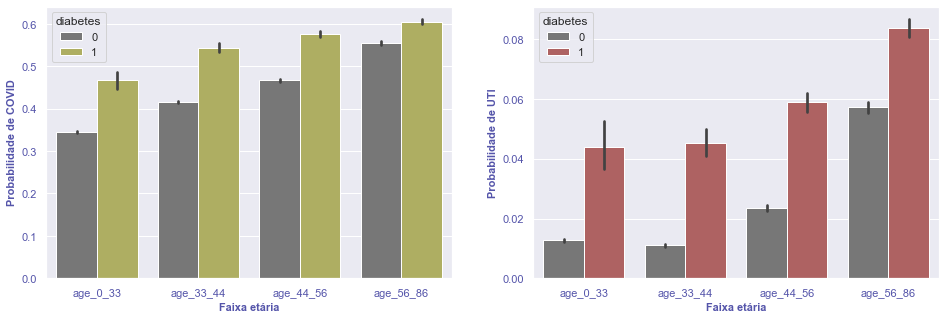

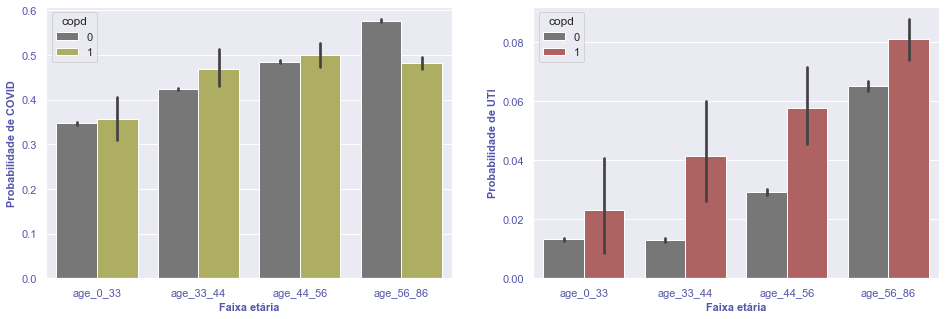

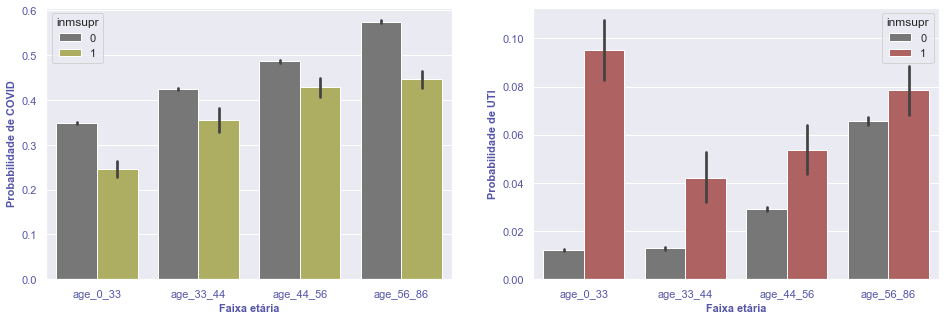

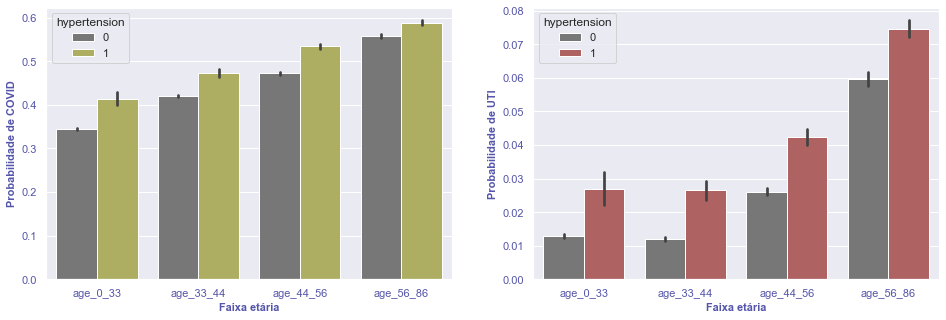

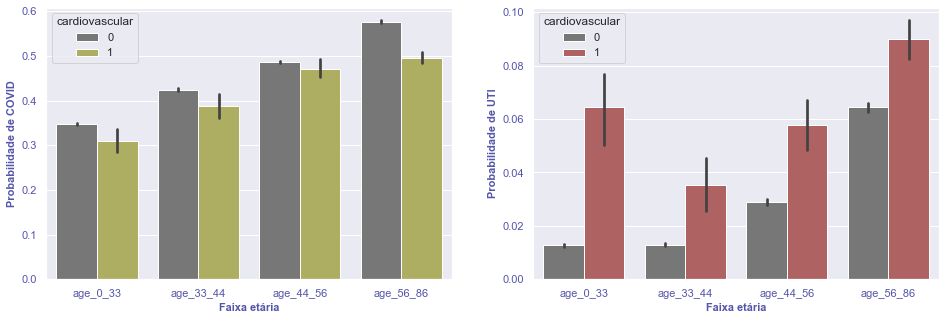

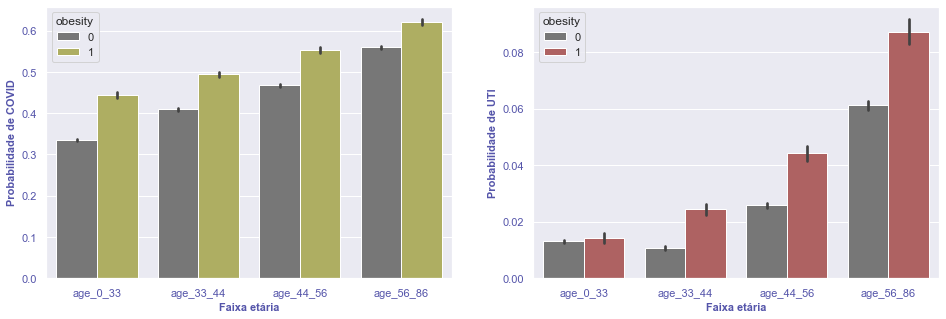

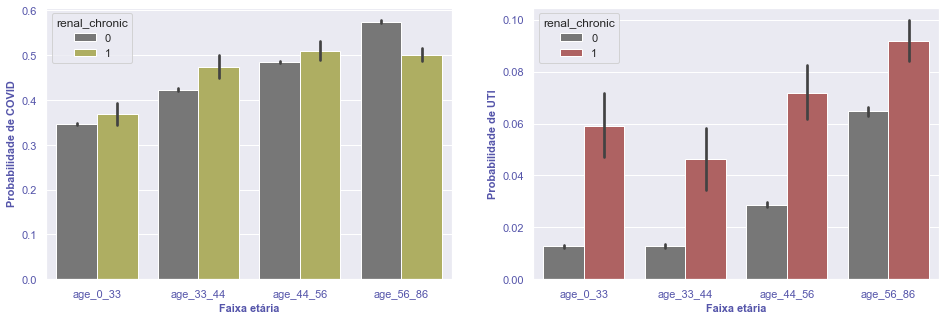

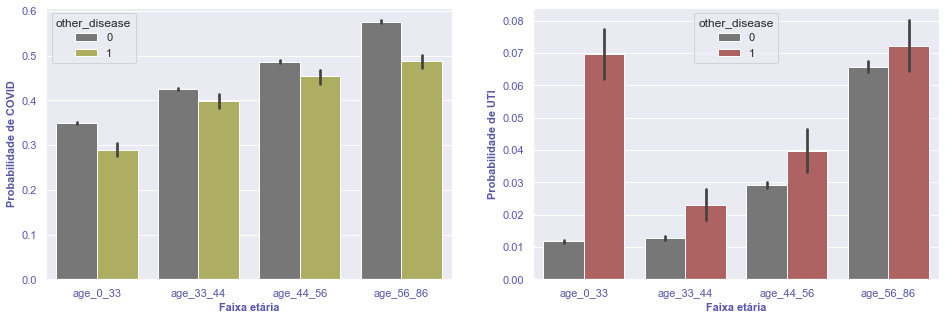

In [84]:
for comorbiditie in comorbidities_temp:
    uci_vs_covid_chances (comorbiditie)

# Modelos

## Objetivo do modelo

Em caso de um cenário de escassez de testes, esse modelo poderá ser usado como uma triagem, para identificar quais pacientes tem mais chances de estar com covid, aumentando assim, as chances de identificarmos um caso positivo.

Tendo em vista esse objetivo, a nossa métrica alvo será o recall. O valor alvo do recall deverá ser definido de acordo com a relação entre a taxa de pacientes e a quantidade de testes disponíveis. Para fins de desenvolvimento, vamos adotar 60% como recall alvo.

Tendo isso em mente, vamos treinar alguns modelos e ver como eles desempenham.

## Dividindo os dados

In [709]:
target = 'covid_res'
features = df_covid.columns.drop([target,'age_group','severity'])

X = df_covid[features]
y = df_covid[target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

## Normalizando as bases

In [710]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Modelos candidatos

In [77]:
def run_model(model, X_train, y_train, X_test, proba=True):
    '''
    Escalona os dados e roda o modelo através de um pipeline.
    Pode retornar ou não as probabilidades de cada predição.
    Retorno: y_pred, y_proba
    dados preditos e probabilidade dos dados
    
    model            -> modelo
    X_train, y_train -> base de treino
    X_test           -> base de teste
    proba, binário: 
                     True  : Retorna as probabilidades. 
                     False : Retorna NONE
    '''
    
    ct = make_column_transformer((StandardScaler(),X_train.columns))  

    pipe = make_pipeline(ct, model)

    pipe.fit(X_train, y_train)
 
    y_pred = pipe.predict(X_test)
    
    if proba:
        try:
            y_proba = pipe.predict_proba(X_test)
        except:
            y_proba = None
    else:
        y_proba = None
    
    return y_pred, y_proba

In [78]:
def metrics_info(y_test, y_pred, show_cm = True):
    '''
    imprime o classification report e o ROC-AUC para os dados preditos e,
    caso show_cm = True, plota a matriz de confusão também
    '''
    print(classification_report(y_test, y_pred))
    auc = round(roc_auc_score(y_test, y_pred, multi_class="ovr", average="macro"),2)
    print('AUC:',auc)
    if show_cm:
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(conf_mat=cm)
        plt.show()

In [79]:
def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    
    for mdl in model_list:

        model = mdl.get('estimator')

        s_fit = time.time()
        model.fit(X_train,y_train)
        y_predict_proba = model.predict_proba(X_test)
        y_predict  = model.predict(X_test)
        e_predict = time.time()

        fit_predict_time = round(e_predict-s_fit,3)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])

        model_name = mdl.get('model_name')
        accuracy = accuracy_score(y_test, y_predict)
        auc = roc_auc_score(y_test, y_predict)
        
        #precision e recall separado por classes
        cm = confusion_matrix(y_test, y_predict)
        precision = cm.diagonal()/cm.sum(axis=0)
        recall = cm.diagonal()/cm.sum(axis=1)
        
        f1 = f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model        : {model_name}")
        print(f"Accuracy     : {accuracy:.4f} ")
        print(f"Precision[0] : {precision[0]:.4f}")
        print(f"Recall[0]    : {recall[0]:.4f}")
        print(f"Precision[1] : {precision[1]:.4f}")
        print(f"Recall[1]    : {recall[1]:.4f}")
        print(f"F1 - Score   : {f1:.4f} ")
        print(f"ROC - AUC    : {auc:.4f} ")
        print(f"Time         : {fit_predict_time} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision[0]": precision[0],
            "recall[0]": recall[0],
            "precision[1]": precision[1],
            "recall[1]": recall[1],
            "f1_score": f1,
            "auc": auc,
            "time":fit_predict_time
        }
        

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response


In [704]:
#configurações para tirar alguns warnings
XGBoost_warning = {'use_label_encoder':False,'eval_metric' :'logloss'}
#configurações para usar o modelo da GPU
XGBoost_gpu = {'tree_method':'gpu_hist', 'gpu_id':0,'predictor':'gpu_predictor'}


random_seed = 42

list_models = [
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed,n_jobs=-1)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state = random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state = random_seed,**XGBoost_warning,**XGBoost_gpu)},
{'model_name': 'LightGBM',
 'estimator' : LGBMClassifier(random_state = random_seed,verbose=-1)},
{'model_name': 'LogisticRegression',
 'estimator' : LogisticRegression(n_jobs=-1)}
]

Model        : Random Forest
Accuracy     : 0.6250 
Precision[0] : 0.6205
Recall[0]    : 0.8462
Precision[1] : 0.6395
Recall[1]    : 0.3452
F1 - Score   : 0.5978 
ROC - AUC    : 0.5957 
Time         : 4.488 
Model        : AdaBoost
Accuracy     : 0.6341 
Precision[0] : 0.6264
Recall[0]    : 0.8545
Precision[1] : 0.6587
Recall[1]    : 0.3553
F1 - Score   : 0.6075 
ROC - AUC    : 0.6049 
Time         : 6.351 
Model        : GradientBoosting
Accuracy     : 0.6361 
Precision[0] : 0.6257
Recall[0]    : 0.8673
Precision[1] : 0.6717
Recall[1]    : 0.3435
F1 - Score   : 0.6067 
ROC - AUC    : 0.6054 
Time         : 14.291 
Model        : XGBoost
Accuracy     : 0.6353 
Precision[0] : 0.6262
Recall[0]    : 0.8609
Precision[1] : 0.6653
Recall[1]    : 0.3498
F1 - Score   : 0.6074 
ROC - AUC    : 0.6054 
Time         : 1.021 
Model        : LightGBM
Accuracy     : 0.6364 
Precision[0] : 0.6259
Recall[0]    : 0.8675
Precision[1] : 0.6724
Recall[1]    : 0.3440
F1 - Score   : 0.6071 
ROC - AUC    : 0.

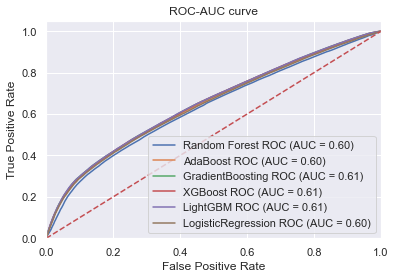

In [711]:
response_bank = test_models_plot_roc_auc_curve(list_models,
                                               X_train_std,
                                               X_test_std,
                                               y_train,
                                               y_test)

In [861]:
candidates = (pd.DataFrame(response_bank).T).sort_values('recall[1]',ascending=False)
candidates

,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
LogisticRegression,0.631000,0.625644,0.844824,0.647433,0.360494,0.605977,0.602659,1.253
AdaBoost,0.634084,0.626399,0.854472,0.658672,0.355274,0.607516,0.604873,6.351
XGBoost,0.635260,0.626177,0.860896,0.665306,0.349811,0.607365,0.605353,1.021
Random Forest,0.624987,0.620456,0.846171,0.639468,0.345169,0.597800,0.595670,4.488
LightGBM,0.636389,0.625892,0.867477,0.672357,0.344042,0.607073,0.605760,0.415
GradientBoosting,0.636059,0.625654,0.867320,0.671746,0.343495,0.606679,0.605407,14.291


## Balanceando os dados

### SMOTE

In [380]:
y_train.value_counts()

0    193958
1    153314
Name: covid_res, dtype: int64

In [381]:
%%timesmote = SMOTE(random_state=42,sampling_strategy='auto',n_jobs=-1)
X_train_sm, y_train_sm = smote.fit_resample(X_train_std, y_train)

In [382]:
y_train_sm.value_counts()

1    193958
0    193958
Name: covid_res, dtype: int64

In [392]:
X_train_sm = pd.DataFrame(X_train_sm,columns = X.columns)
X_test_std = pd.DataFrame(X_test_std,columns = X.columns)

In [2]:
import pickle

X_train_sm_file_name = 'X_train_sm'
y_train_sm_file_name = 'y_train_sm'
X_test_std_file_name = 'X_test_std'
y_test_file_name = 'y_test'

#Salva a base de treino após o SMOTE
#file = open(X_train_sm_file_name,'wb')
#pickle.dump(X_train_sm, file)
#file.close()
#
#file = open(y_train_sm_file_name,'wb')
#pickle.dump(y_train_sm, file)
#file.close()
#
#file = open(X_test_std_file_name,'wb')
#pickle.dump(X_test_std, file)
#file.close()
#
#file = open(y_test_file_name,'wb')
#pickle.dump(y_test, file)
#file.close()

#Carrega o df após o SMOTE
file = open(X_train_sm_file_name,'rb')
X_train_sm = pickle.load(file)
file.close()

file = open(y_train_sm_file_name,'rb')
y_train_sm = pickle.load(file)
file.close()

file = open(X_test_std_file_name,'rb')
X_test_std = pickle.load(file)
file.close()

file = open(y_test_file_name,'rb')
y_test = pickle.load(file)
file.close()

In [714]:
X_train_sm.head()

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
0,-0.985426,0.543784,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
1,1.014789,-0.753162,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,2.289167,-0.150344,2.257792,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
2,-0.985426,-1.617793,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
3,-0.985426,-0.320847,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
4,-0.985426,1.717211,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,-1.923913,-0.166769,-0.135522


Model        : Random Forest
Accuracy     : 0.6198 
Precision[0] : 0.6294
Recall[0]    : 0.7763
Precision[1] : 0.5984
Recall[1]    : 0.4218
F1 - Score   : 0.6067 
ROC - AUC    : 0.5990 
Time         : 5.64 
Model        : AdaBoost
Accuracy     : 0.6240 
Precision[0] : 0.6403
Recall[0]    : 0.7459
Precision[1] : 0.5938
Recall[1]    : 0.4699
F1 - Score   : 0.6165 
ROC - AUC    : 0.6079 
Time         : 8.72 
Model        : GradientBoosting
Accuracy     : 0.6273 
Precision[0] : 0.6401
Recall[0]    : 0.7602
Precision[1] : 0.6022
Recall[1]    : 0.4593
F1 - Score   : 0.6182 
ROC - AUC    : 0.6097 
Time         : 22.767 
Model        : XGBoost
Accuracy     : 0.6303 
Precision[0] : 0.6368
Recall[0]    : 0.7869
Precision[1] : 0.6159
Recall[1]    : 0.4322
F1 - Score   : 0.6174 
ROC - AUC    : 0.6096 
Time         : 1.018 
Model        : LightGBM
Accuracy     : 0.6301 
Precision[0] : 0.6378
Recall[0]    : 0.7816
Precision[1] : 0.6135
Recall[1]    : 0.4385
F1 - Score   : 0.6181 
ROC - AUC    : 0.61

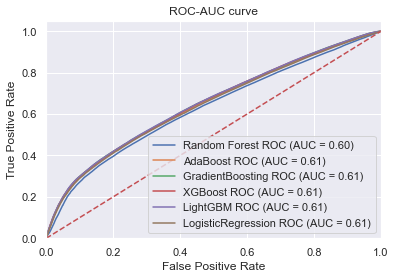

In [715]:
response_bank_sm = test_models_plot_roc_auc_curve(list_models,
                                                  X_train_sm,
                                                  X_test_std,
                                                  y_train_sm,
                                                  y_test)

In [863]:
candidates_sm = (pd.DataFrame(response_bank_sm).T).sort_values('recall[1]',ascending=False)
candidates_sm

,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
LogisticRegression,0.619685,0.641315,0.723982,0.582776,0.487741,0.614318,0.605861,1.515
AdaBoost,0.624032,0.640285,0.745889,0.593765,0.469874,0.616458,0.607881,8.720
GradientBoosting,0.627338,0.640097,0.760192,0.602203,0.459266,0.618228,0.609729,22.767
LightGBM,0.630133,0.637820,0.781582,0.613464,0.438538,0.618113,0.610060,0.495
XGBoost,0.630321,0.636803,0.786923,0.615883,0.432207,0.617418,0.609565,1.018
Random Forest,0.619779,0.629416,0.776289,0.598445,0.421782,0.606723,0.599035,5.640


### CBU (Clustering Based Undersampling)

Tentei seguir esse artigo, mas, pelo o que eu entendi, ele treinou um modelo por cluster e depois fez um stack para ponderar a predição dos modelos. Após o balanceamento de cada cluster, eu juntei os dados de todos os clusters do dataframe e treinei apenas um modelo.

https://arxiv.org/ftp/arxiv/papers/2005/2005.03582.pdf

In [716]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.base import clone
from sklearn.utils import check_random_state
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import distance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

##### Calculando o número de clusters

In [333]:

def calculate_wcss(data):
    wcss = []

    for n in range(2, 20):
        model = KMeans(n_clusters=n, random_state=42)
        model.fit(X=data)
        wcss.append(model.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


In [334]:
n_clusters = optimal_number_of_clusters(calculate_wcss(X_train_std))
n_clusters

12

#### Criando os clusters

In [696]:
km = KMeans(n_clusters= n_clusters,random_state=42)
km.fit(X_train_std)
km_clusters = km.predict(X_train_std)
km_clusters

array([0, 4, 0, ..., 0, 0, 1])

#### Checando a estabilidade dos clusters

In [90]:
def get_dict(cluster_centers):
    '''Recebe os centróides de n instancias do Kmeans. Adota o primeiro conjunto de centróides como referência e, através da comparação das distâncias euclidianas entre os centróides, identifica a equivalência dos clusters para as diferentes instâncias de kmeans.
    Retorna um dicionário de dicionários com essa equivalência (sendo que o -1 sempre equivale a si mesmo).
    Exemplo:
    {1: {-1: -1, 6: 0, 5: 1, 2: 2, 4: 3, 3: 4, 1: 5, 0: 6},
     2: {-1: -1, 4: 0, 0: 1, 6: 2, 3: 3, 1: 4, 2: 5, 5: 6},
     3: {-1: -1, 4: 0, 0: 1, 2: 2, 3: 3, 1: 4, 5: 5, 6: 6}}
    Aqui, podemos entender que, para a instância 1, o label 6 equivale ao label 0 da primeira instancia, o lebel 5 equivale ao label 1 e assim sucessivamente.
    '''
    dicts = {}
    for n_center,other_centers in enumerate(cluster_centers[1:]):
        d=[]
        #nesse primeiro for, pega o cluster zero como referência
        #e guarda os centróides de cada cluster em uma lista
        for i,center_a in enumerate(cluster_centers[0]):
            d.append([])
            
            #nesse segundo for, calcula a distância euclidiana de cada centróide das outras instâncias do kmeans
            #em relação aos centróides de referência
            for j,center_b in enumerate(other_centers):
                d[i].append(distance.euclidean(center_a, center_b))
        
        #array com as distâncias euclidianas
        np_d=np.array(d)

        dict_center = {-1:-1}
        
        #esse for verifica qual label tem o centróide mais próximo do centróide do label de referência
        #e monta o dicionário
        for i,center in enumerate(np_d):
            k=0
            #esse while é pra resolver algum possível empate. 
            #caso um dos elementos da equivalência identificada já tenha sido atribuído,
            #defina a equivalência como o segundo centróide mais próximo
            while True:
                #defina a chave do dicionário como a posição da menor distância euclidiana
                dict_key = np.argpartition(center, k)[k]
                #caso a posição no dicionário esteja vazia, atribua a equivalência
                if dict_center.get(dict_key)==None:
                    dict_center[dict_key] = i
                    break
                #caso a posição não esteja vazia, faça a equivalência com o segundo mais próximo (ou treceiro, ou quarto...)
                else:
                    k+=1
                    dict_key = np.argpartition(center, k)[k]
        #guarde as equivalências dessa instancia do kmeans no dicionário a ser retornado
        dicts[n_center+1] = dict_center
    return dicts

def get_score(labels,cluster_centers,n_iter):
    '''Recebe um vetor com os labels, os centróides de cada label e o número de iterações.
    Retorna o score médio de semelhança entre os clusters equivalentes
    '''
    dict_map = get_dict(cluster_centers)
    mapped_labels=labels.copy()

    #converte os labels para labes equivalentes
    for i in range(1,len(labels)):
        mapped_labels[i] = np.vectorize(dict_map[i].get)(labels[i])

    score=np.array([])
    
    #calcula o percentual de labels que são iguais 
    for label_a in mapped_labels:
        for label_b in mapped_labels:
            #defina uma m´scara excluindo as posições com -1
            mask = (label_a==-1)|(label_b==-1)
            
            #calcule um vetor binário onde as posições iguais são True e as diferentes são False
            same = label_a[~mask]==label_b[~mask]
            
            #conte quantos valores são True e quantos são False
            #salve no score o valor percentual da contagem de True: sum(True)/(sum(True)+sum(False))
            count = np.unique(same, return_counts=True)
            score=np.append(score,count[1][-1]/count[1].sum())

    #mascare com uma matriz triangular (para ignorar a diagonal)
    mask_score = (1-np.triu(np.ones(n_iter, dtype='int')))
    mask_score = np.where(mask_score.ravel()==1)
    #retorne a média dos scores
    return score.ravel()[mask_score].mean()

def kmeans_stability(X,est,n_iter):    
    rng = np.random.RandomState(42)
    labels = []
    indices = []
    cluster_centers = []
    for i in range(n_iter):
        # draw bootstrap samples, store indices
        sample_indices = rng.randint(0, X.shape[0], X.shape[0])
        indices.append(sample_indices)

        est = clone(est)
        if hasattr(est, "random_state"):
            # randomize estimator if possible
            est.random_state = rng.randint(1e5)

        X_bootstrap = X[sample_indices]
        est.fit(X_bootstrap)
        cluster_centers.append(est.cluster_centers_)
        # store clustering outcome using original indices
        relabel = -np.ones(X.shape[0], dtype='int')
        relabel[sample_indices] = est.labels_
        labels.append(relabel)
    
    score = get_score(labels,cluster_centers,n_iter)
    return score

In [647]:
kmeans_stability(X_train_std, km, n_iter=20)

0.8145435011427893

#### Perfil dos clusters

##### Distribuição de resultados positivos e negativos em cada cluster

In [697]:
for cluster in np.unique(km_clusters):    
    print('Cluster:',cluster)
    mask = km_clusters== cluster
    print(y_train[mask].value_counts())

Cluster: 0
0    64626
1    48263
Name: covid_res, dtype: int64
Cluster: 1
1    28695
0    11622
Name: covid_res, dtype: int64
Cluster: 2
1    4490
0    1751
Name: covid_res, dtype: int64
Cluster: 3
0    2780
1    2620
Name: covid_res, dtype: int64
Cluster: 4
0    77419
1    45638
Name: covid_res, dtype: int64
Cluster: 5
0    1551
1    1017
Name: covid_res, dtype: int64
Cluster: 6
0    14554
1     9111
Name: covid_res, dtype: int64
Cluster: 7
0    6116
1    3538
Name: covid_res, dtype: int64
Cluster: 8
0    2720
1    2374
Name: covid_res, dtype: int64
Cluster: 9
0    3088
1    1801
Name: covid_res, dtype: int64
Cluster: 10
0    4638
1    3202
Name: covid_res, dtype: int64
Cluster: 11
0    3093
1    2565
Name: covid_res, dtype: int64


##### Visualização dos clusters

In [683]:
pca = PCA(4)
components = pca.fit_transform(X_train_std)

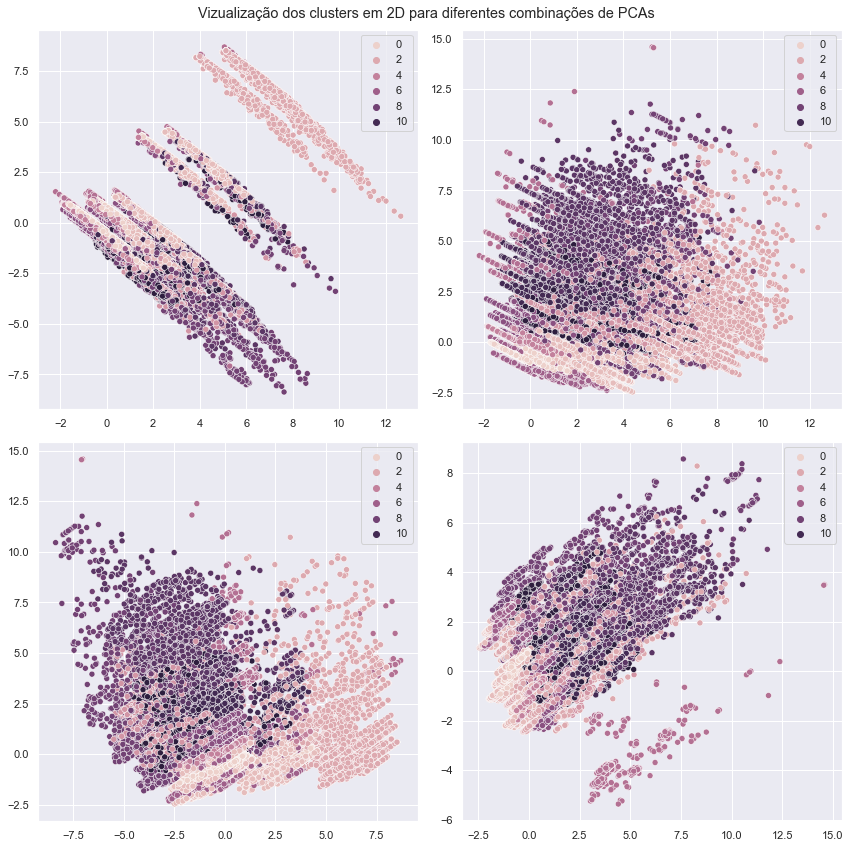

In [688]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(x=components[:,0],y=components[:,1],hue=km_clusters,ax=ax[0][0])
sns.scatterplot(x=components[:,0],y=components[:,2],hue=km_clusters,ax=ax[0][1])
sns.scatterplot(x=components[:,1],y=components[:,2],hue=km_clusters,ax=ax[1][0])
sns.scatterplot(x=components[:,2],y=components[:,3],hue=km_clusters,ax=ax[1][1])

fig.suptitle('Vizualização dos clusters em 2D para diferentes combinações de PCAs')

fig.tight_layout()

#### Visualização em 3d utilizando as 3 principais componentes do PCA

In [ ]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=components[:,0],  # <-- Put your data instead
    y=components[:,1],  # <-- Put your data instead
    z=components[:,2],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
        'color':km_clusters,
        'colorscale':'deep'
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

#### Fazendo o undersampling em cada cluster

In [717]:
rus = RandomUnderSampler(random_state=1)

X_train_us=np.array([])

#para cada cluster
for cluster in np.unique(km_clusters):

    #faça o undersamping dentro da cada cluster
    mask = km_clusters == cluster
    X_train_temp, y_train_temp = rus.fit_resample(X_train_std[mask],y_train[mask])

    #concatene os clusters para formar a base de treino
    if (cluster == 0):
        X_train_us = X_train_temp
        y_train_us = y_train_temp
    else:  
        X_train_us = np.concatenate([X_train_us,X_train_temp])
        y_train_us = np.concatenate([y_train_us,y_train_temp])

In [718]:
X_train_us = pd.DataFrame(X_train_us,columns = X.columns)
y_train_us = pd.Series(y_train_us)
X_train_us.head()

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
0,-0.985426,0.976099,-0.086313,-0.42962,2.657272,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
1,-0.985426,-0.012050,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
2,-0.985426,-0.444366,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
3,-0.985426,-0.876681,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
4,-0.985426,-0.259088,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522


In [719]:
y_train_us.value_counts()

0    133502
1    133502
dtype: int64

In [171]:
X_train_std = pd.DataFrame(X_train_std,columns = X_train.columns)

#### Calculando o desempenho dos modelos

Model        : Random Forest
Accuracy     : 0.5849 
Precision[0] : 0.6132
Recall[0]    : 0.6954
Precision[1] : 0.5359
Recall[1]    : 0.4450
F1 - Score   : 0.5787 
ROC - AUC    : 0.5702 
Time         : 2.81 
Model        : AdaBoost
Accuracy     : 0.5976 
Precision[0] : 0.6475
Recall[0]    : 0.6133
Precision[1] : 0.5415
Recall[1]    : 0.5777
F1 - Score   : 0.5986 
ROC - AUC    : 0.5955 
Time         : 5.225 
Model        : GradientBoosting
Accuracy     : 0.6023 
Precision[0] : 0.6447
Recall[0]    : 0.6414
Precision[1] : 0.5492
Recall[1]    : 0.5528
F1 - Score   : 0.6024 
ROC - AUC    : 0.5971 
Time         : 12.578 
Model        : XGBoost
Accuracy     : 0.6014 
Precision[0] : 0.6337
Recall[0]    : 0.6789
Precision[1] : 0.5534
Recall[1]    : 0.5035
F1 - Score   : 0.5989 
ROC - AUC    : 0.5912 
Time         : 0.908 
Model        : LightGBM
Accuracy     : 0.6045 
Precision[0] : 0.6395
Recall[0]    : 0.6688
Precision[1] : 0.5552
Recall[1]    : 0.5231
F1 - Score   : 0.6030 
ROC - AUC    : 0.5

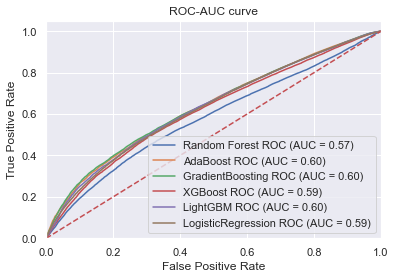

In [724]:
response_bank_us = test_models_plot_roc_auc_curve(list_models,
                                                  X_train_us,
                                                  X_test_std,
                                                  y_train_us,
                                                  y_test)

In [864]:
candidates_cbu = (pd.DataFrame(response_bank_us).T).sort_values('recall[1]',ascending=False)
candidates_cbu

,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
AdaBoost,0.597566,0.647533,0.613281,0.541453,0.577686,0.598615,0.595483,5.225
LogisticRegression,0.594771,0.641603,0.621774,0.539516,0.560610,0.595476,0.591192,1.388
GradientBoosting,0.602276,0.644691,0.641371,0.549240,0.552818,0.602409,0.597095,12.578
LightGBM,0.604474,0.639529,0.668788,0.555247,0.523110,0.603003,0.595949,0.382
XGBoost,0.601443,0.633659,0.678893,0.553444,0.503462,0.598887,0.591178,0.908
Random Forest,0.584854,0.613170,0.695411,0.535925,0.444991,0.578657,0.570201,2.810


##### Salvando em pickle

In [875]:
import pickle

X_train_us_file_name = 'X_train_us'
y_train_us_file_name = 'y_train_us'
X_test_std_file_name = 'X_test_std'
y_test_file_name = 'y_test'

#Salva a base de treino após o usOTE
#file = open(X_train_us_file_name,'wb')
#pickle.dump(X_train_us, file)
#file.close()
#
#file = open(y_train_us_file_name,'wb')
#pickle.dump(y_train_us, file)
#file.close()
#
#file = open(X_test_std_file_name,'wb')
#pickle.dump(X_test_std, file)
#file.close()
#
#file = open(y_test_file_name,'wb')
#pickle.dump(y_test, file)
#file.close()

#Carrega o df após o usOTE
file = open(X_train_us_file_name,'rb')
X_train_us = pickle.load(file)
file.close()

file = open(y_train_us_file_name,'rb')
y_train_us = pickle.load(file)
file.close()

file = open(X_test_std_file_name,'rb')
X_test_std = pickle.load(file)
file.close()

file = open(y_test_file_name,'rb')
y_test = pickle.load(file)
file.close()

### Comparando os resultados com e sem balanceamento de dados

In [865]:
print('Sem balanceamento')
display(candidates)

print('\n\nSMOTE')
display(candidates_sm)

print('\n\nCBU')
display(candidates_cbu)

Sem balanceamento


,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
LogisticRegression,0.631000,0.625644,0.844824,0.647433,0.360494,0.605977,0.602659,1.253
AdaBoost,0.634084,0.626399,0.854472,0.658672,0.355274,0.607516,0.604873,6.351
XGBoost,0.635260,0.626177,0.860896,0.665306,0.349811,0.607365,0.605353,1.021
Random Forest,0.624987,0.620456,0.846171,0.639468,0.345169,0.597800,0.595670,4.488
LightGBM,0.636389,0.625892,0.867477,0.672357,0.344042,0.607073,0.605760,0.415
GradientBoosting,0.636059,0.625654,0.867320,0.671746,0.343495,0.606679,0.605407,14.291




SMOTE


,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
LogisticRegression,0.619685,0.641315,0.723982,0.582776,0.487741,0.614318,0.605861,1.515
AdaBoost,0.624032,0.640285,0.745889,0.593765,0.469874,0.616458,0.607881,8.720
GradientBoosting,0.627338,0.640097,0.760192,0.602203,0.459266,0.618228,0.609729,22.767
LightGBM,0.630133,0.637820,0.781582,0.613464,0.438538,0.618113,0.610060,0.495
XGBoost,0.630321,0.636803,0.786923,0.615883,0.432207,0.617418,0.609565,1.018
Random Forest,0.619779,0.629416,0.776289,0.598445,0.421782,0.606723,0.599035,5.640




CBU


,accuracy,precision[0],recall[0],precision[1],recall[1],f1_score,auc,time
AdaBoost,0.597566,0.647533,0.613281,0.541453,0.577686,0.598615,0.595483,5.225
LogisticRegression,0.594771,0.641603,0.621774,0.539516,0.560610,0.595476,0.591192,1.388
GradientBoosting,0.602276,0.644691,0.641371,0.549240,0.552818,0.602409,0.597095,12.578
LightGBM,0.604474,0.639529,0.668788,0.555247,0.523110,0.603003,0.595949,0.382
XGBoost,0.601443,0.633659,0.678893,0.553444,0.503462,0.598887,0.591178,0.908
Random Forest,0.584854,0.613170,0.695411,0.535925,0.444991,0.578657,0.570201,2.810


### Conclusões do balanceamento

- Sem balanceamento: Tende a priorizar o recall da classe majoritária e equilibrar o precision da classe 1 e 2, tudo isso às custas do recall da classe minoritária.
- SMOTE: Tende a melhorar o recall da classe minoritária e diminuir o recall da classe majoritária.
- CBU: Cria um modelo muito mais balanceado entre as duas classes, aproximando o precision e o recall dentro das classes.

### Árvore de decisão pouco profunda

In [7]:
def viz_tree(model,X,y,
             target_name='Target',
             orientation="TD",
             colors=None,
             fancy=True,
             pickX=False,
             label_fontsize=14,
             ticks_fontsize=12,
             fontname="Arial"):

    model.fit(X, y)

    viz = dtreeviz(model,
                   X,
                   y,
                   target_name=target_name,
                   feature_names=X.columns,
                   orientation=orientation,
                   class_names=y.unique().tolist(),
                   fancy=fancy,
                   colors=colors,
                   #X=X,
                   label_fontsize=label_fontsize,
                   ticks_fontsize=ticks_fontsize,
                   fontname=fontname)
    return viz

d:\Users\lyrio\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


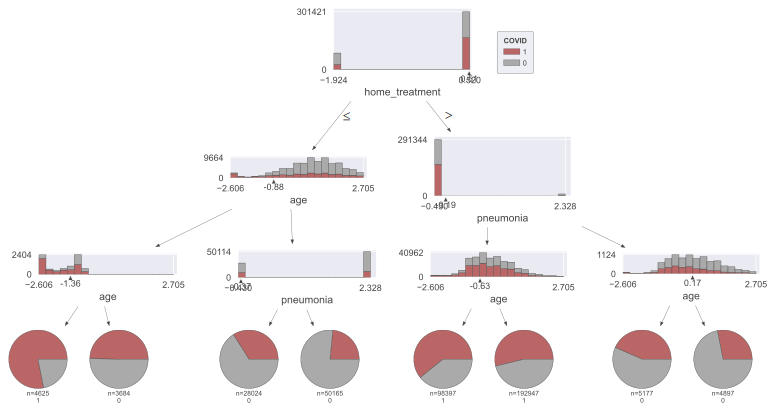

In [8]:
decision_tree = DecisionTreeClassifier(max_depth=3)
viz_tree_pallete = [None, None, ['#B66','#AAA']]  # 2 classes
viz_tree(decision_tree,X_train_sm,y_train_sm,'COVID',colors={'classes':viz_tree_pallete})

Em uma árvore simples (de 3 níveis), podemos observar que as features mais importantes para dividir os pacientes com COVID são: home_treatment, age, pneumonia e obesity (embora as folhas com mais amostras tenham proporções muito equilibradas).

## OPTUNA (com cross validate)

Vamos usar o OPTUNA para achar os melhores hiperparâmetros para os seguintes modelos:
- Decision Tree
- XGBoost
- LightGBM

Como vamos ajustar o TS depois, vamos otimizar o ROC-AUC, buscando os parêmetros para uma melhor curva.

##### Para praticidade do desenvolvimento, trechos para salvar e carregar com o pickle os estudos já feitos

In [733]:
study_ADA_file = 'study_ADA'
study_XGB_gpu_file = 'study_XGB_gpu'
study_LGBM_file = 'study_LGBM'

In [411]:
#salvando
#import pickle
#
#file = open(study_ADA_file,'wb')
#pickle.dump(study_ADA, file)
#file.close()
#
#file = open(study_XGB_gpu_file,'wb')
#pickle.dump(study_XGB_gpu, file)
#file.close()
#
#file = open(study_LGBM_file,'wb')
#pickle.dump(study_LGBM, file)
#file.close()

In [412]:
#carregando
#import pickle
#
#file = open(study_ADA_file,'rb')
#study_ADA = pickle.load(file)
#file.close()
#
#file = open(study_XGB_gpu_file,'rb')
#study_XGB_gpu = pickle.load(file)
#file.close()
#
#file = open(study_LGBM_file,'rb')
#study_LGBM = pickle.load(file)
#file.close()

### ADABoost

In [935]:
def objective(trial):
    params = dict(
        n_estimators = trial.suggest_int("n_estimators", 1, 100),
        learning_rate = trial.suggest_float("learning_rate", 0.1, 1,step=0.1)
    )

    ADABoost = AdaBoostClassifier(**params, random_state=42)
    model=XGB_gpu
        
    scores = cross_validate(ADABoost,X_train_us, y_train_us,scoring=['precision','recall','roc_auc'],cv=5)


    metric_dc = {
        'recall': scores['test_recall'].mean(),
        'precision': scores['test_precision'].mean(),
        'roc_auc': scores['test_roc_auc'].mean()
    }
    return metric_dc[metric_to_optimze]

In [1029]:
metric_to_optimze = 'roc_auc'  # accuracy, precision, recall, f1

#comente o trecho abaixo se carregou pelo pickle
#Cria um novo estudo (caso não tenha carregado um estudo antigo)
study_ADA = optuna.create_study(direction='maximize')

[I 2022-02-27 21:11:08,841] A new study created in memory with name: no-name-a5d95d02-0d52-4e99-8f8b-84251f882941


In [1044]:
study_ADA.optimize(objective, n_trials=100)

##### Antes do OPTUNA

In [1036]:
candidates_cbu.loc['AdaBoost',:]

accuracy        0.597566
precision[0]    0.647533
recall[0]       0.613281
precision[1]    0.541453
recall[1]       0.577686
f1_score        0.598615
auc             0.595483
time            5.225000
Name: AdaBoost, dtype: float64

##### Após o OPTUNA

              precision    recall  f1-score   support

           0       0.65      0.61      0.63     83125
           1       0.54      0.58      0.56     65707

    accuracy                           0.60    148832
   macro avg       0.59      0.60      0.59    148832
weighted avg       0.60      0.60      0.60    148832

AUC: 0.6


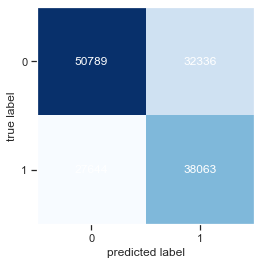

In [1037]:
best_ADA = study_ADA.best_params

ADABoost = AdaBoostClassifier(**best_ADA, random_state=42)

ADABoost.fit(X_train_us, y_train_us)

y_pred_ADABoost = ADABoost.predict(X_test_std)

metrics_info(y_test, y_pred_ADABoost)

### XGBoost

O modelo da GPU e CPU do XGBoost possuem alguns parâmetros diferentes. Vamos otimizar modelo da GPU.

In [907]:
def objective(trial):
    params = dict(
        subsample = trial.suggest_float('subsample', 0.1, 1),
        sampling_method = trial.suggest_categorical('sampling_method', ['uniform','gradient_based']),
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1),
        colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1, 1),
        max_bin = trial.suggest_int('max_bin', 256, 5000, log=True),
        gamma = trial.suggest_float('gamma', 0, 10),
        grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    )
    
    XGB_gpu = XGBClassifier(n_jobs = -1,**XGBoost_gpu,**XGBoost_warning,**params, random_state=42)
    model=XGB_gpu
        
    scores = cross_validate(XGB_gpu,X_train_us, y_train_us,scoring=['precision','recall','roc_auc'],cv=10)


    metric_dc = {
        'recall': scores['test_recall'].mean(),
        'precision': scores['test_precision'].mean(),
        'roc_auc': scores['test_roc_auc'].mean()
    }
    return metric_dc[metric_to_optimze]

In [908]:
metric_to_optimze = 'roc_auc'  # accuracy, precision, recall, f1

#comente o trecho abaixo se carregou pelo pickle
#Cria um novo estudo (caso não tenha carregado um estudo antigo)
study_XGB_gpu = optuna.create_study(direction='maximize')

[I 2022-02-27 20:33:04,983] A new study created in memory with name: no-name-af463487-535a-4b12-b32e-9473566a8619


In [1043]:
study_XGB_gpu.optimize(objective, n_trials=600)

In [854]:
plot_optimization_history(study_XGB_gpu)

##### Features mais importantes para otimizar o recall da classe 1

In [855]:
plot_param_importances(study_XGB_gpu)

In [947]:
best_XGB_gpu = study_XGB_gpu.best_params
best_XGB_gpu

{'subsample': 0.6896245809805381,
 'sampling_method': 'gradient_based',
 'colsample_bytree': 0.15165313225569466,
 'colsample_bylevel': 0.6053309703876227,
 'max_bin': 385,
 'gamma': 4.217401845418217,
 'grow_policy': 'depthwise'}

##### Antes do OPTUNA

In [921]:
candidates_cbu.loc['XGBoost',:]

accuracy        0.601443
precision[0]    0.633659
recall[0]       0.678893
precision[1]    0.553444
recall[1]       0.503462
f1_score        0.598887
auc             0.591178
time            0.908000
Name: XGBoost, dtype: float64

##### Após o OPTUNA

In [948]:
XGB_gpu = XGBClassifier(n_jobs = -1,**best_XGB_gpu,**XGBoost_gpu,**XGBoost_warning, random_state=42)

XGB_gpu.fit(X_train_us, y_train_us)

y_pred_XGB_gpu = XGB_gpu.predict(X_test_std)

metrics_info(y_test, y_pred_XGB_gpu,show_cm=False)

              precision    recall  f1-score   support

           0       0.65      0.58      0.61     83125
           1       0.53      0.61      0.57     65707

    accuracy                           0.59    148832
   macro avg       0.59      0.59      0.59    148832
weighted avg       0.60      0.59      0.59    148832

AUC: 0.59


Podemos percer uma boa melhora na recall da classe 1

### LightGBM

In [841]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200, step=10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 200, 10000, step=100),
        "reg_alpha": trial.suggest_int("reg_alpha", 0, 20),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 20),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 30),
        "subsample": trial.suggest_float("subsample", 0.1, 0.9, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [1]),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 0.9, step=0.1),
        'max_bin': trial.suggest_int("max_bin", 10, 250, step=30),         
        'tree_learner': trial.suggest_categorical("tree_learner", ['serial','feature','voting','data'])
    }

    LGBM = LGBMClassifier(device="gpu",verbose=-1,random_state=42,**params,n_jobs=-1)
    
    scores = cross_validate(LGBM,X_train_us, y_train_us,scoring=['recall','roc_auc','precision'],cv=10)

    metric_dc = {
        'recall': scores['test_recall'].mean(),
        'precision': scores['test_precision'].mean(),
        'roc_auc': scores['test_roc_auc'].mean()
    }
    return metric_dc[metric_to_optimze]

In [842]:
metric_to_optimze = 'roc_auc'  # accuracy, precision, recall, f1

#Cria um novo estudo (caso não tenha carregado um estudo antigo)
study_LGBM = optuna.create_study(direction='maximize')

In [1042]:
study_LGBM.optimize(objective, n_trials=300)

In [844]:
plot_optimization_history(study_LGBM)

##### Features mais importantes para otimizar a recall da classe 1

In [845]:
plot_param_importances(study_LGBM)

In [912]:
best_LGBM = study_LGBM.best_params
best_LGBM

{'n_estimators': 60,
 'learning_rate': 0.04711997352757978,
 'num_leaves': 2660,
 'max_depth': 12,
 'min_child_samples': 1200,
 'reg_alpha': 17,
 'reg_lambda': 20,
 'min_split_gain': 2.124082390199491,
 'subsample': 0.8,
 'subsample_freq': 1,
 'colsample_bytree': 0.4,
 'max_bin': 220,
 'tree_learner': 'data'}

##### Antes do OPTUNA

In [868]:
candidates_cbu.loc['LightGBM',:]

accuracy        0.604474
precision[0]    0.639529
recall[0]       0.668788
precision[1]    0.555247
recall[1]       0.523110
f1_score        0.603003
auc             0.595949
time            0.382000
Name: LightGBM, dtype: float64

##### Após o OPTUNA

              precision    recall  f1-score   support

           0       0.65      0.64      0.64     83125
           1       0.55      0.56      0.56     65707

    accuracy                           0.61    148832
   macro avg       0.60      0.60      0.60    148832
weighted avg       0.61      0.61      0.61    148832

AUC: 0.6


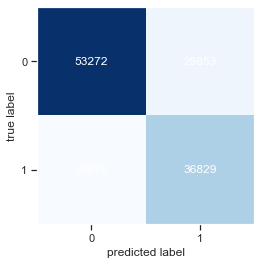

In [914]:
LGBM = LGBMClassifier(device="gpu",**best_LGBM,verbose=-1,random_state=42,n_jobs=-1)

LGBM.fit(X_train_us, y_train_us)

y_pred_LGBM = LGBM.predict(X_test_std)

metrics_info(y_test, y_pred_LGBM)

## Ajuste do ts

É muito subjetivo definir o recall. Como estamos olhando a situação sob a óptica de um problema de escassez, quantos mais testes disponíveis para serem aplicados após a triagem, maior poderá ser nosso recall alvo.

In [878]:
from sklearn.metrics import precision_recall_curve
def plot_p_recall(y_test,y_proba,title="Precision-Recall vs Threshold Chart",ax=None,lines = ["b--","r--"],offset=0):
    if not ax:
        fig, ax = plt.subplots(1,1,figsize=(12,6))

    #função do sklearn que retorna os arrays a serem plotados
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:,1])

    #plotando as duas curvas
    ax.plot(thresholds-offset, precision[: -1], lines[0], label="Precision")
    ax.plot(thresholds-offset, recall[: -1], lines[1], label="Recall")

    #Formatando os testos do gráfico
    ax.set_title(title)
    ax.set_ylabel("Precision, Recall")
    ax.set_xlabel("Threshold")
    ax.legend(loc="lower left")

    ax.set(
        xlim=(0, 1), 
        ylim=(0, 1), 
        autoscale_on=False
    )

### Plotando as curvas de precision e recall vs o threshold para cada modelo

In [1027]:
y_proba_ADABoost = ADABoost.predict_proba(X_test_std)
y_proba_XGB_gpu  = XGB_gpu.predict_proba(X_test_std)
y_proba_LGBM     = LGBM.predict_proba(X_test_std)

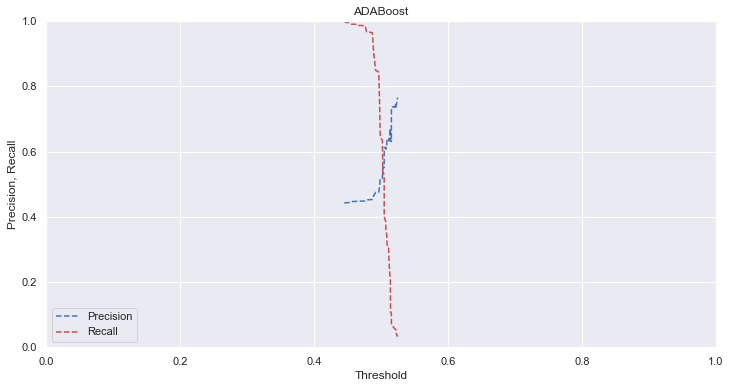

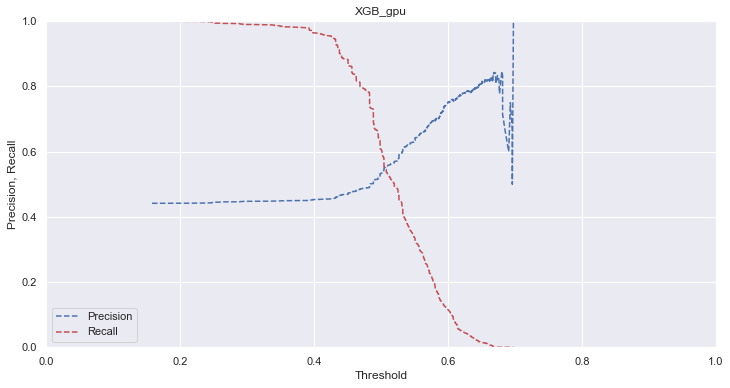

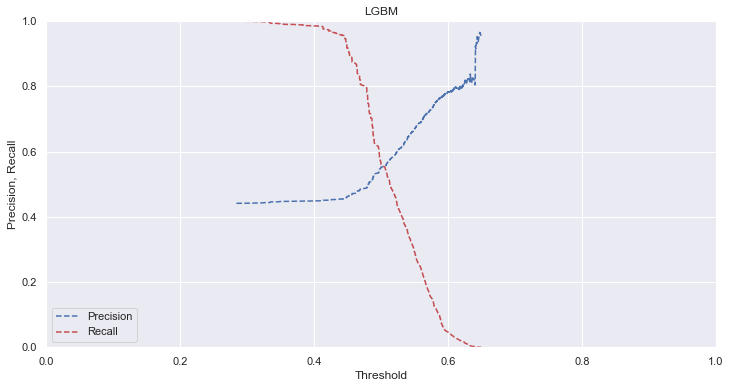

In [954]:
plot_p_recall(y_test,y_proba_ADABoost,title = 'ADABoost')

plot_p_recall(y_test,y_proba_XGB_gpu,title = 'XGB_gpu')

plot_p_recall(y_test,y_proba_LGBM,title = 'LGBM')

Arbitrariamente, vamos ajustar os modelos selecionados para a mesma faixa de recall (em torno de 60%) e ver qual tem o melhor desempenho (pelo gráfico podemos observar que não será possóvel fazer o ajuste fino do recall do adaboost)

In [1028]:
ts_XGB_gpu = 0.5
ts_LGBM = 0.497

y_pred_LGBM_ts = (y_proba_LGBM[:,1] > ts_LGBM).astype(int)
y_pred_XGB_gpu_ts = (y_proba_XGB_gpu[:,1] > ts_XGB_gpu).astype(int)


print('\n\nXGB_gpu')
metrics_info(y_test, y_pred_XGB_gpu_ts, show_cm=False)

print('LGBM')
metrics_info(y_test, y_pred_LGBM_ts, show_cm=False)





XGB_gpu
              precision    recall  f1-score   support

           0       0.65      0.58      0.61     83125
           1       0.53      0.61      0.57     65707

    accuracy                           0.59    148832
   macro avg       0.59      0.59      0.59    148832
weighted avg       0.60      0.59      0.59    148832

AUC: 0.59
LGBM
              precision    recall  f1-score   support

           0       0.65      0.59      0.62     83125
           1       0.54      0.61      0.57     65707

    accuracy                           0.60    148832
   macro avg       0.60      0.60      0.59    148832
weighted avg       0.60      0.60      0.60    148832

AUC: 0.6


Após o ajuste do recall, observamos que o LGBM obteve o melhor recall da classe 1 para esse ponto de operação, e melhores desempenhos na classe 0, mas o XGBoost teve um desempenho muito próximo também.

## Conclusão da seleção de modelos

- Após o ajuste do threshold, o LightGBM apresentou o melhor desempenho.

Vale apena reforçar que o XGBoost teve um desempenho praticamente igual, e que o LightGBM tem um ajuste mais fino de thereshold do que o adaboost, apresentando um melhor desempenho para a o recal especificado (60%)

Vamos prosseguir com o Light GBM, com ts = 0.497

O objetivo do modelo é fazer uma triagem para decidir quais pacientes serão testados. Inicialmente, escolhendo um paciente ao acaso, tinhamos uma chance de 44% de identificar um paciente positivo. Após a triagem do modelo, temos 54% de probabilidade de identificar um paciente positivo (podendo identificar 61% dos casos totais)

              precision    recall  f1-score   support

           0       0.65      0.59      0.62     83125
           1       0.54      0.61      0.57     65707

    accuracy                           0.60    148832
   macro avg       0.60      0.60      0.59    148832
weighted avg       0.60      0.60      0.60    148832

AUC: 0.6


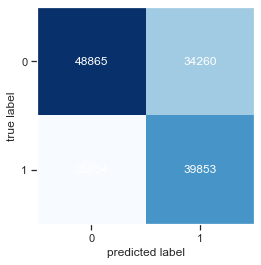

In [997]:
metrics_info(y_test, y_pred_LGBM_ts)

Além disso podemos ver como o modelo performa para diferentes grupos de comorbidades.

## Separando os resultados por comorbidades

In [938]:
features[2:14]

Index(['pregnancy', 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'other_disease'],
      dtype='object')

In [939]:
X_test.reset_index(drop=True)

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
0,0,60,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,44,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,44,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148827,0,73,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
148828,1,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
148829,1,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
148830,1,55,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [940]:
X_test_std[X_test.reset_index(drop=True)['asthma']==1]

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
15,1.014789,0.049709,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
49,-0.985426,-0.197328,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
95,1.014789,-1.617793,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,-1.923913,-0.166769,-0.135522
106,1.014789,0.049709,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
112,1.014789,-0.197328,-0.086313,-0.42962,2.657272,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,2.257792,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148746,1.014789,-0.073810,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,2.289167,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
148751,-0.985426,-1.803071,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,2.257792,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
148755,1.014789,0.111468,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,-0.436840,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
148771,1.014789,0.790821,-0.086313,-0.42962,-0.376326,-0.125301,5.46924,-0.127465,2.289167,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522


In [998]:
results = dict()
for feature in features[2:14]:
    mask = X_test.reset_index(drop=True)[feature]==1
    y_proba_LGBM = LGBM.predict_proba(X_test_std[mask])
    y_pred = (y_proba_LGBM[:,1] > ts_LGBM).astype(int)    
    results[feature] = {'y_test':y_test.reset_index(drop=True)[mask],
                        'y_pred':y_pred}

In [999]:
print('dict:\tresults')
for key in results.keys():
    print('\t\t',key,':',results[key].keys())

dict:	results
		 pregnancy : dict_keys(['y_test', 'y_pred'])
		 pneumonia : dict_keys(['y_test', 'y_pred'])
		 diabetes : dict_keys(['y_test', 'y_pred'])
		 copd : dict_keys(['y_test', 'y_pred'])
		 asthma : dict_keys(['y_test', 'y_pred'])
		 inmsupr : dict_keys(['y_test', 'y_pred'])
		 hypertension : dict_keys(['y_test', 'y_pred'])
		 cardiovascular : dict_keys(['y_test', 'y_pred'])
		 obesity : dict_keys(['y_test', 'y_pred'])
		 renal_chronic : dict_keys(['y_test', 'y_pred'])
		 tobacco : dict_keys(['y_test', 'y_pred'])
		 other_disease : dict_keys(['y_test', 'y_pred'])


### Detalhes do desempenho do modelo para cada comorbidade

Logo após os detalhes, segue uma tabela resumida

In [1000]:
for feature in results.keys():
    print(feature.title())
    metrics_info(results[feature]['y_test'], results[feature]['y_pred'],show_cm=False)

Pregnancy
              precision    recall  f1-score   support

           0       0.63      0.83      0.72       631
           1       0.49      0.25      0.33       404

    accuracy                           0.60      1035
   macro avg       0.56      0.54      0.53      1035
weighted avg       0.58      0.60      0.57      1035

AUC: 0.54
Pneumonia
              precision    recall  f1-score   support

           0       0.68      0.14      0.23      7334
           1       0.71      0.97      0.82     15701

    accuracy                           0.70     23035
   macro avg       0.69      0.55      0.52     23035
weighted avg       0.70      0.70      0.63     23035

AUC: 0.55
Diabetes
              precision    recall  f1-score   support

           0       0.56      0.04      0.07      7652
           1       0.59      0.98      0.73     10756

    accuracy                           0.59     18408
   macro avg       0.57      0.51      0.40     18408
weighted avg       0.58  

##### Tabela resumida, ordenada por F1

In [1004]:
features_results = dict()
for feature in results.keys():
    result_list=[]
    result_list.append(round(precision_score(results[feature]['y_test'], results[feature]['y_pred']),2))
    result_list.append(round(recall_score(results[feature]['y_test'], results[feature]['y_pred']),2))
    result_list.append(round(f1_score(results[feature]['y_test'], results[feature]['y_pred']),2))
    features_results[feature] = result_list
    
features_results = (pd.DataFrame(features_results,index=['Precision','Recall','F1']).T).sort_values('F1',ascending=False)

In [1005]:
features_results

,Precision,Recall,F1
pneumonia,0.71,0.97,0.82
diabetes,0.59,0.98,0.73
hypertension,0.57,0.93,0.70
obesity,0.53,0.98,0.69
copd,0.51,0.85,0.64
renal_chronic,0.52,0.79,0.63
cardiovascular,0.53,0.74,0.62
other_disease,0.51,0.62,0.56
inmsupr,0.43,0.71,0.54
tobacco,0.48,0.58,0.53


Aquiu, é possível perceber, claramente, quais condições o modelo prioriza para que o paciente seja testado.

# Predizendo os resultados do arquivo de testes

## Tratando o csv

In [1006]:
df_subm_na = pd.read_csv("COVID_subm.csv")
df_subm_na.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,373402,1,1,NaN,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
1,181022,0,1,NaN,0.0,26,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,317841,0,1,NaN,0.0,57,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,272745,1,1,NaN,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,153280,0,0,0.0,0.0,55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [1007]:
df_subm_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   sex                  1000 non-null   int64  
 2   patient_type         1000 non-null   int64  
 3   intubed              229 non-null    float64
 4   pneumonia            1000 non-null   float64
 5   age                  1000 non-null   int64  
 6   pregnancy            482 non-null    float64
 7   diabetes             996 non-null    float64
 8   copd                 997 non-null    float64
 9   asthma               996 non-null    float64
 10  inmsupr              997 non-null    float64
 11  hypertension         997 non-null    float64
 12  other_disease        997 non-null    float64
 13  cardiovascular       997 non-null    float64
 14  obesity              996 non-null    float64
 15  renal_chronic        997 non-null    fl

In [1008]:
df_subm_na.isna().sum()

Unnamed: 0               0
sex                      0
patient_type             0
intubed                771
pneumonia                0
age                      0
pregnancy              518
diabetes                 4
copd                     3
asthma                   4
inmsupr                  3
hypertension             3
other_disease            3
cardiovascular           3
obesity                  4
renal_chronic            3
tobacco                  4
contact_other_covid    330
icu                    771
dtype: int64

Preenchendo valores faltantes com algumas regras

In [1009]:
#a coluna contact other covid foi descartada
df_subm_na.drop(columns='contact_other_covid',inplace=True)

#pacientes do gênero masculino tem pregnancy = 0
male_mask = df_subm_na['sex'] == 0
df_subm_na['pregnancy'].iloc[:][male_mask] = 0

#pacientes que não foram internados não podem ter sido intubados nem ido pra UTI
mask = df_subm_na['patient_type'] == 1
df_subm_na.loc[mask,'icu'] = 0
df_subm_na.loc[mask,'intubed'] = 0

In [1010]:
df_subm_na.isna().sum()

Unnamed: 0        0
sex               0
patient_type      0
intubed           1
pneumonia         0
age               0
pregnancy         1
diabetes          4
copd              3
asthma            4
inmsupr           3
hypertension      3
other_disease     3
cardiovascular    3
obesity           4
renal_chronic     3
tobacco           4
icu               1
dtype: int64

Preenchendo os demais valores faltantes com o Simple Imputer

In [1011]:
df_subm = pd.DataFrame(boolean_imputer.transform(df_subm_na[boolean_na_columns]), columns = boolean_na_columns)
df_subm['age'] = pd.DataFrame(int_imputer.transform(df_subm_na[['age']]))
df_subm.head()

,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu,age
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


Fazendo pequenos ajustes

In [1012]:
#alterando o tipo dos dados
df_subm = df_subm.astype('uint8')

#reordenando as colunas
df_subm = df_subm[ordered_columns[0:-1]]

#renomeando a feature patient_type
df_subm.rename(columns={'patient_type':'home_treatment'},inplace=True)

In [1013]:
df_subm.isna().sum().sum()

0

In [1014]:
df_subm.head()

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
0,1,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,57,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Predizendo os resultados

Normalizando o df

In [1015]:
df_subm_std = pd.DataFrame(std.transform(df_subm), columns=df_subm.columns)

Predizendo os valores

In [1018]:
y_proba_LGBM = LGBM.predict_proba(df_subm_std)
y_pred = (y_proba_LGBM[:,1] > ts_LGBM).astype(int)    

In [1021]:
df_subm_std.head()

,sex,age,pregnancy,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,other_disease,home_treatment,icu,intubed
0,1.014789,-0.444366,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,2.257792,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
1,-0.985426,-1.000200,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
2,-0.985426,0.914340,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
3,1.014789,-0.135569,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,0.519774,-0.166769,-0.135522
4,-0.985426,0.790821,-0.086313,-0.42962,-0.376326,-0.125301,-0.182841,-0.127465,-0.43684,-0.150344,-0.442911,-0.142274,-0.306382,-0.178094,-1.923913,-0.166769,-0.135522


In [1020]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

Salvando em um arquivo .csv

In [1025]:
pd.Series(y_pred).value_counts(normalize=True)

1    0.51
0    0.49
dtype: float64

In [1022]:
pd.Series.to_csv(pd.Series(y_pred),'y_subm.csv',index = False,header=False)

# Conclusão

Em cada tópico do notebook foram feitas as devidas observações e conclusões.

Recaptulando o que dissemos anteriormente, inicialmente, escolhendo um paciente ao acaso, tinhamos uma chance de 44% de identificar um paciente positivo. Após a triagem do modelo, temos 52% de probabilidade de identificar um paciente positivo (podendo identificar 64% dos casos totais)

Ao priorizar os pacientes de acordo com suas comorbidades (ou presença de pneumonia), é possível melhorar ainda mais esse desempenho.